In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

Set plot style

In [3]:
set_nature_style()

## Set paths

In [4]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"

# Output
plots_path = data_dir / "classification_per_oligo_plots"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

## Load anndata

In [5]:
adata = sc.read_h5ad(adata_path)

In [6]:
print("All ions:")
print(adata.var.unlabeled_annotation_id.unique())

All ions:
['C18H36O2-H', 'C18H34O2-H', 'C16H32O2-H', 'C16H30O2-H', 'C14H28O2-H']
Categories (5, object): ['C14H28O2-H', 'C16H30O2-H', 'C16H32O2-H', 'C18H34O2-H', 'C18H36O2-H']


## Plot distribtuion of some features

In [ ]:
adata.obs["GFP and condition"] = adata.obs.apply(lambda row: row["condition"] + " " + row['assigned GFP class'], axis=1)

In [83]:
adata.obs["GFP and condition"].unique()

array(['ACLYkd Ol.2 + Wildtype low', 'ACLYkd Ol.2 + Wildtype high',
       'ACLYkd Ol.2 low', 'ACLYkd Ol.2 high', 'Wildtype low',
       'Wildtype high', 'ACLY Ol.1 + Wildtype low',
       'ACLY Ol.1 + Wildtype high', 'ACLY Ol.1 low', 'ACLY Ol.1 high'],
      dtype=object)

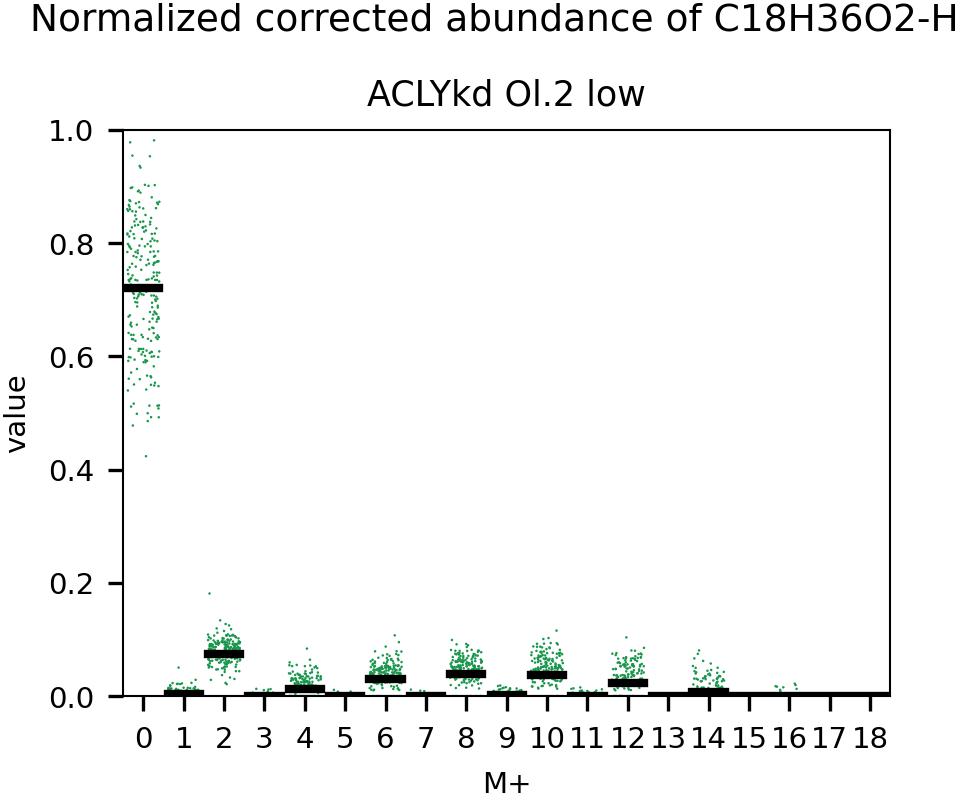

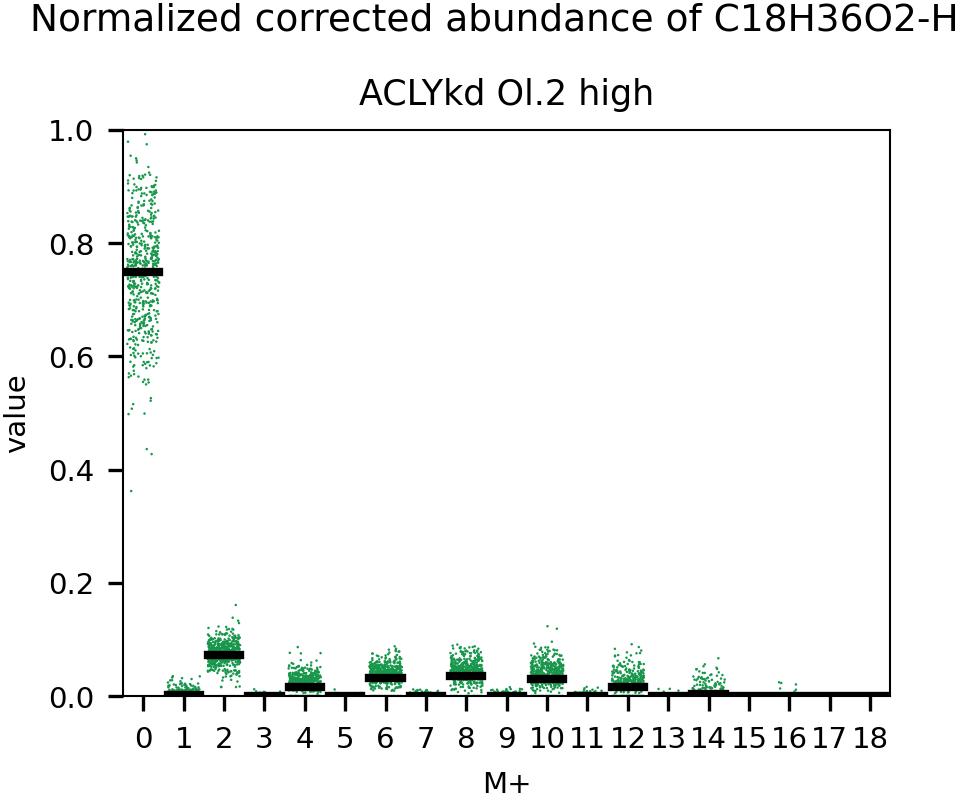

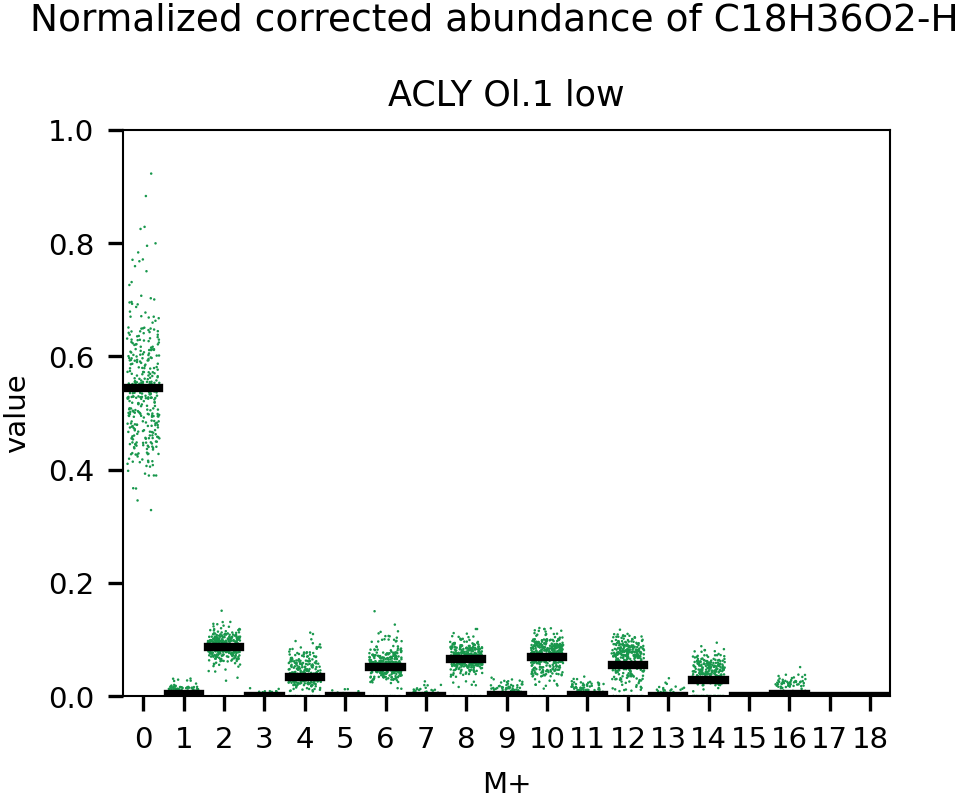

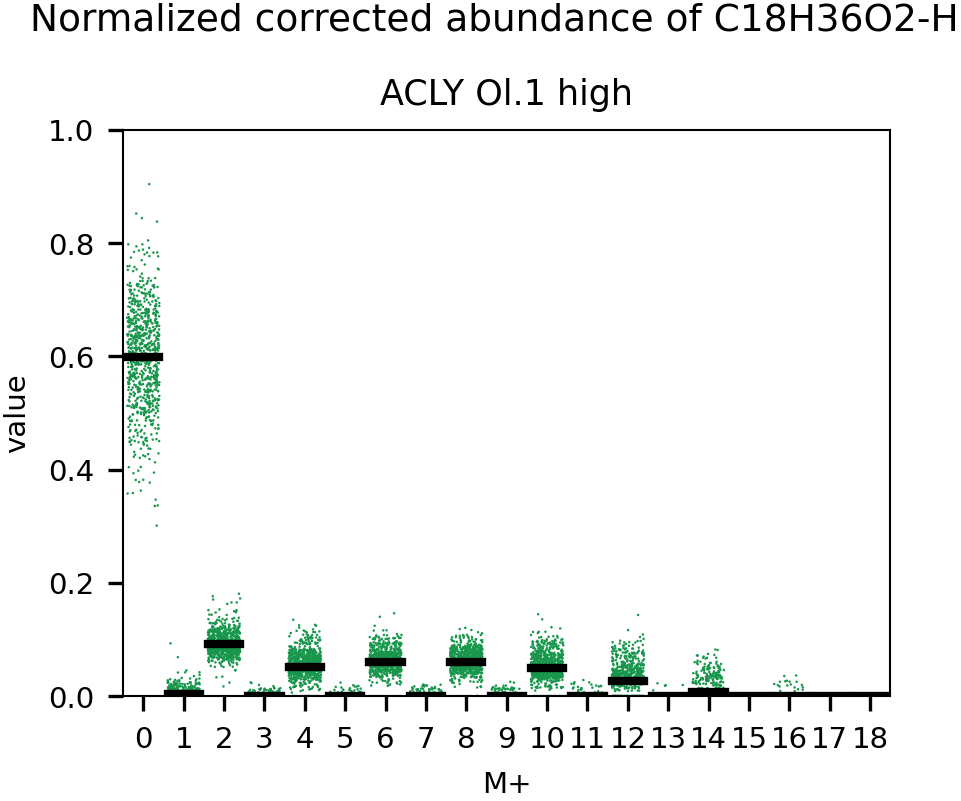

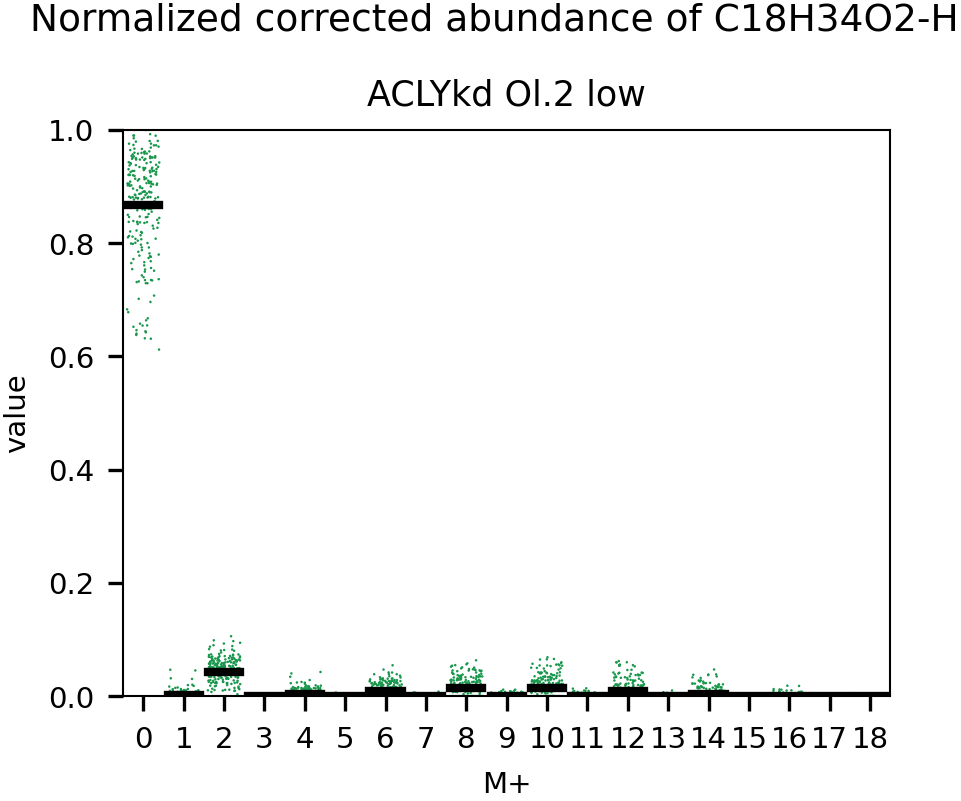

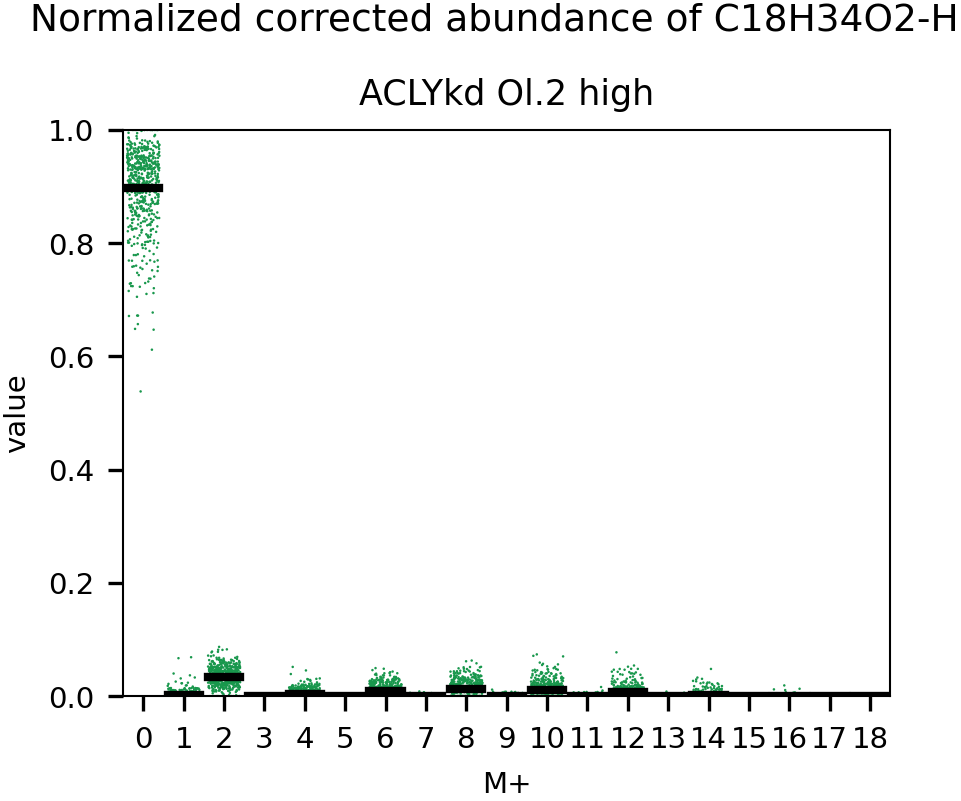

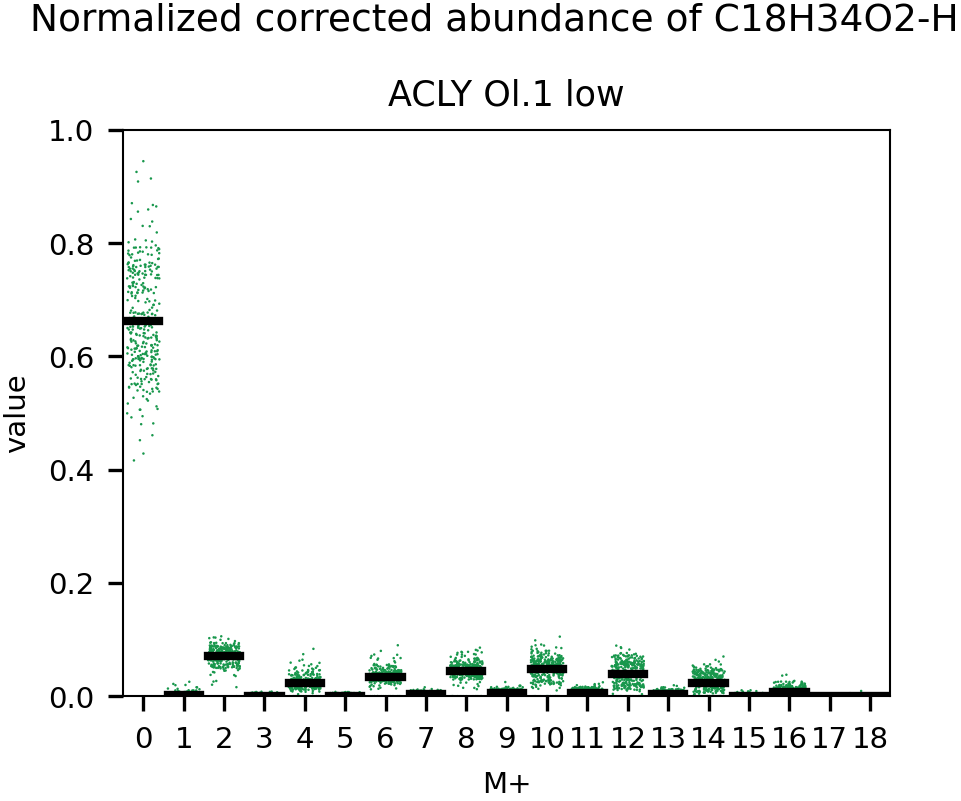

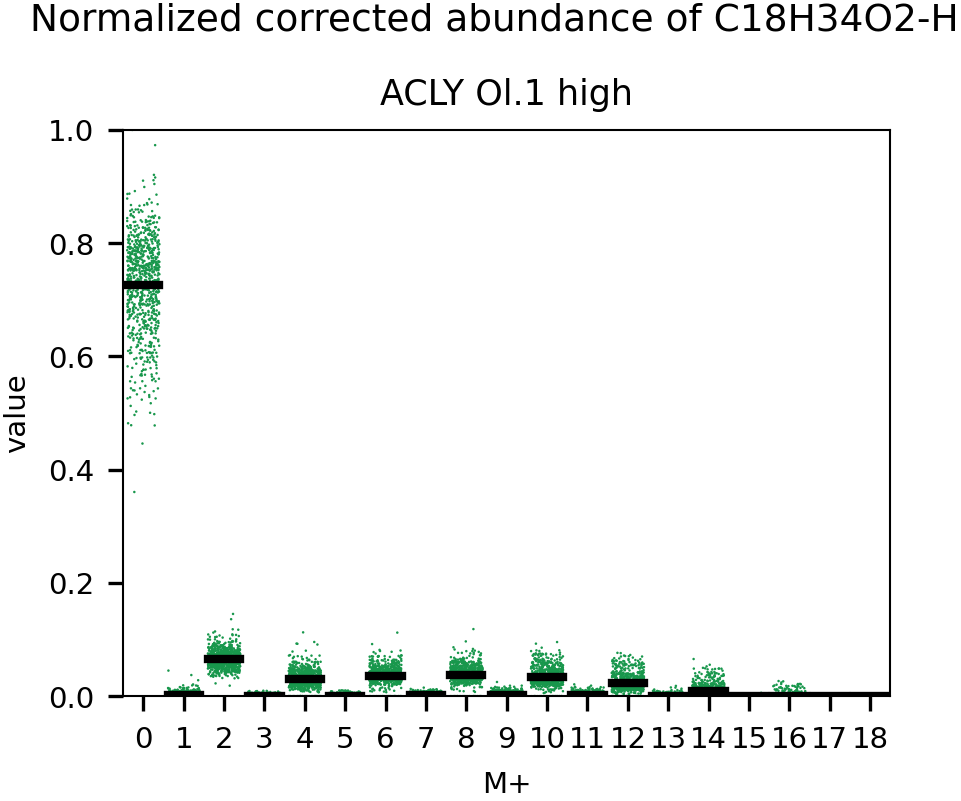

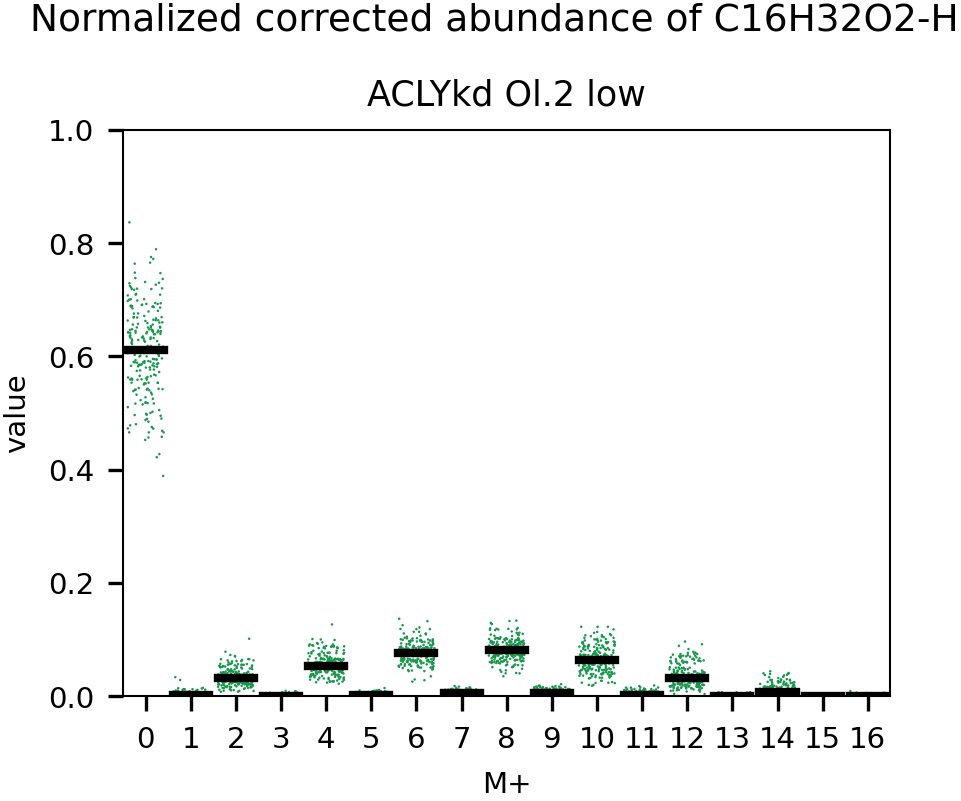

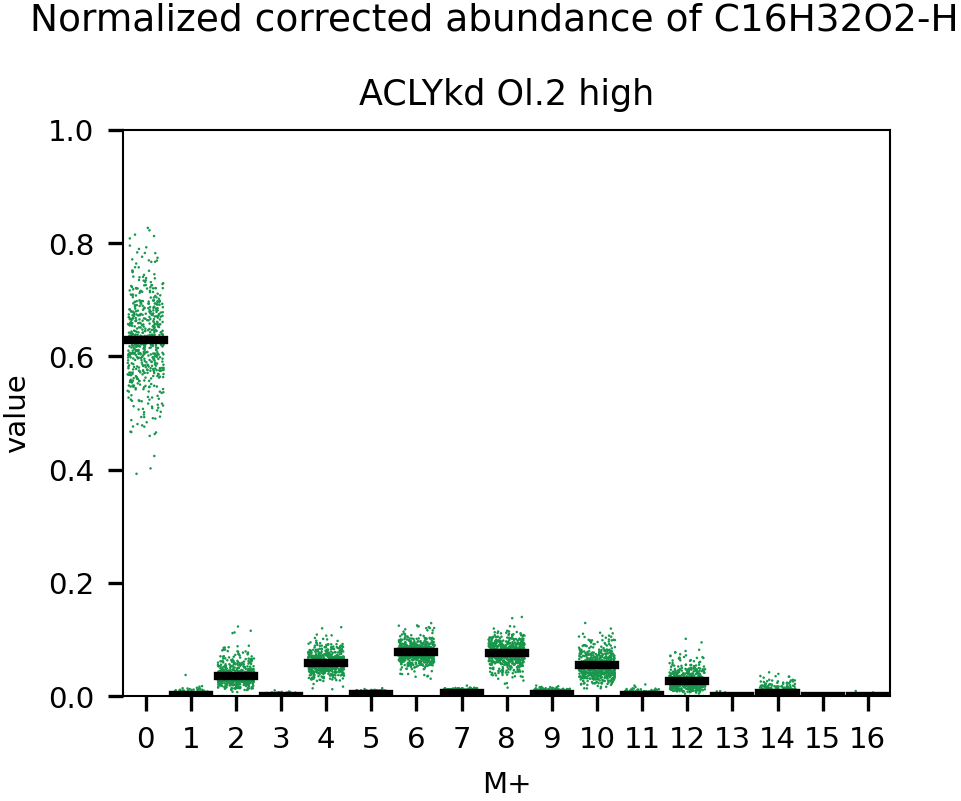

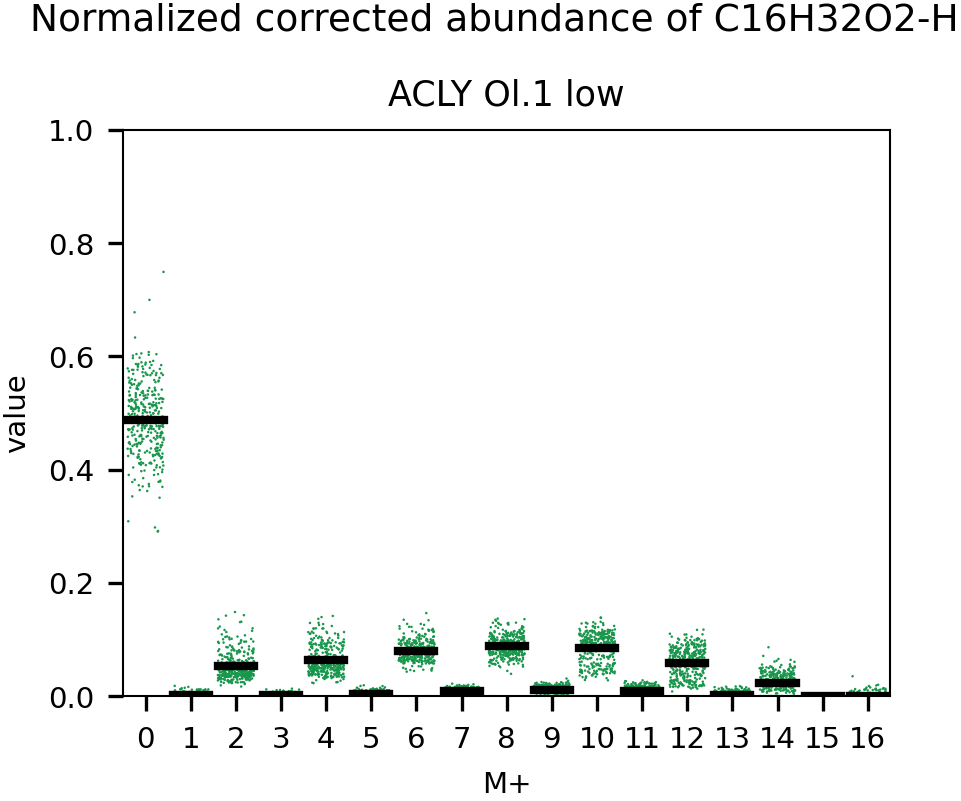

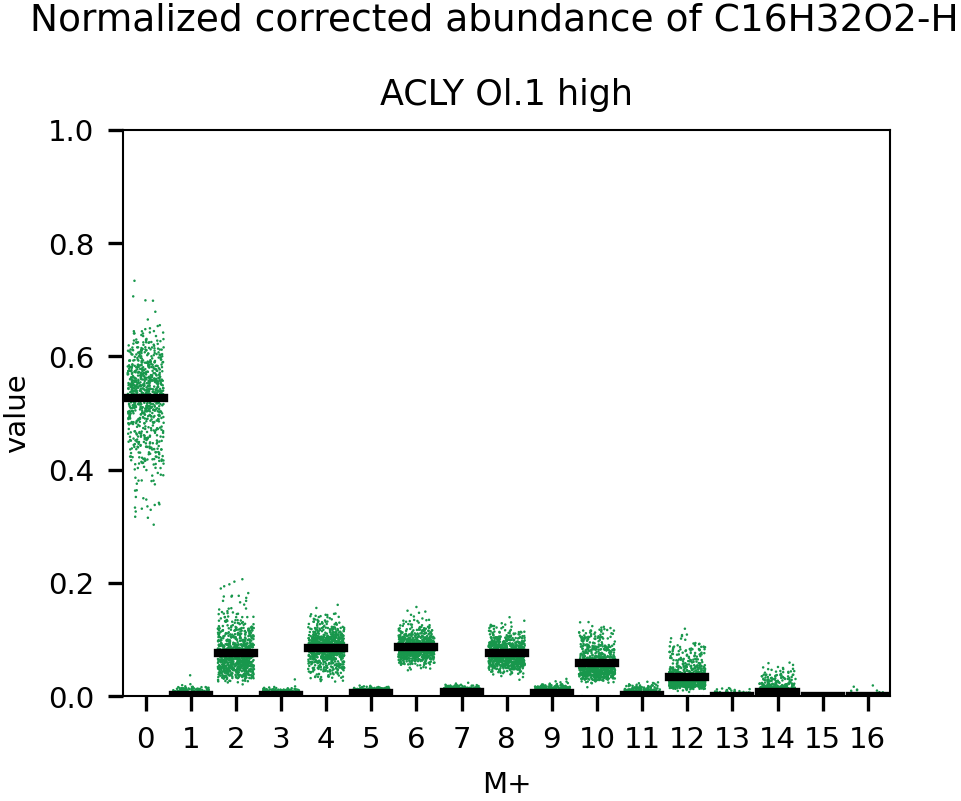

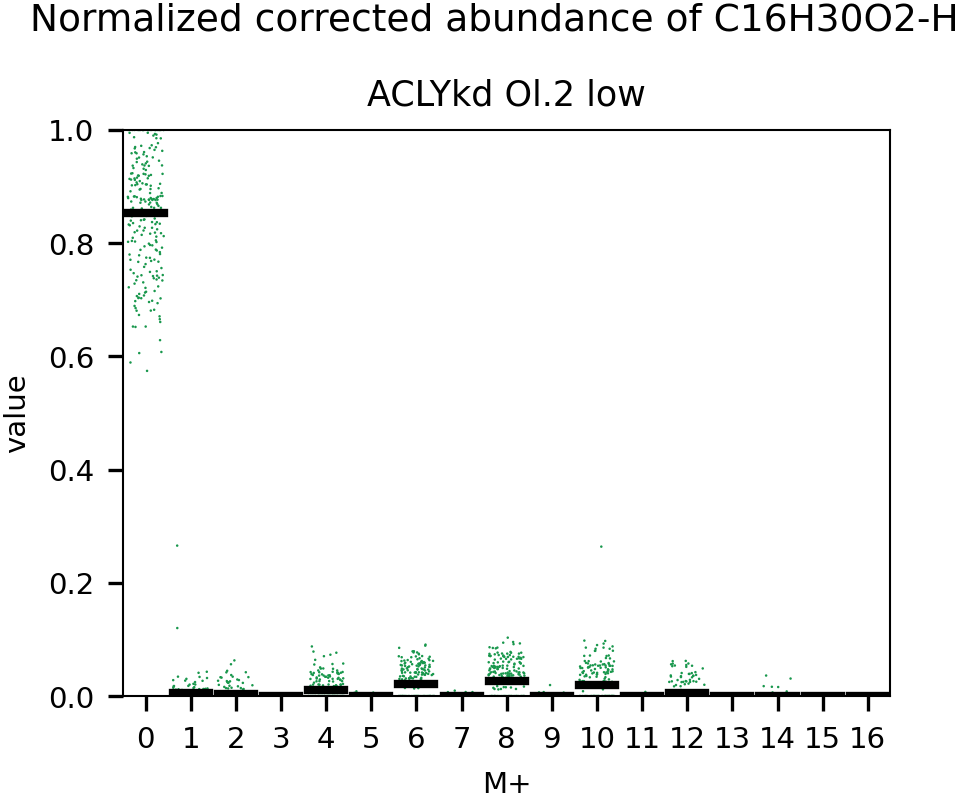

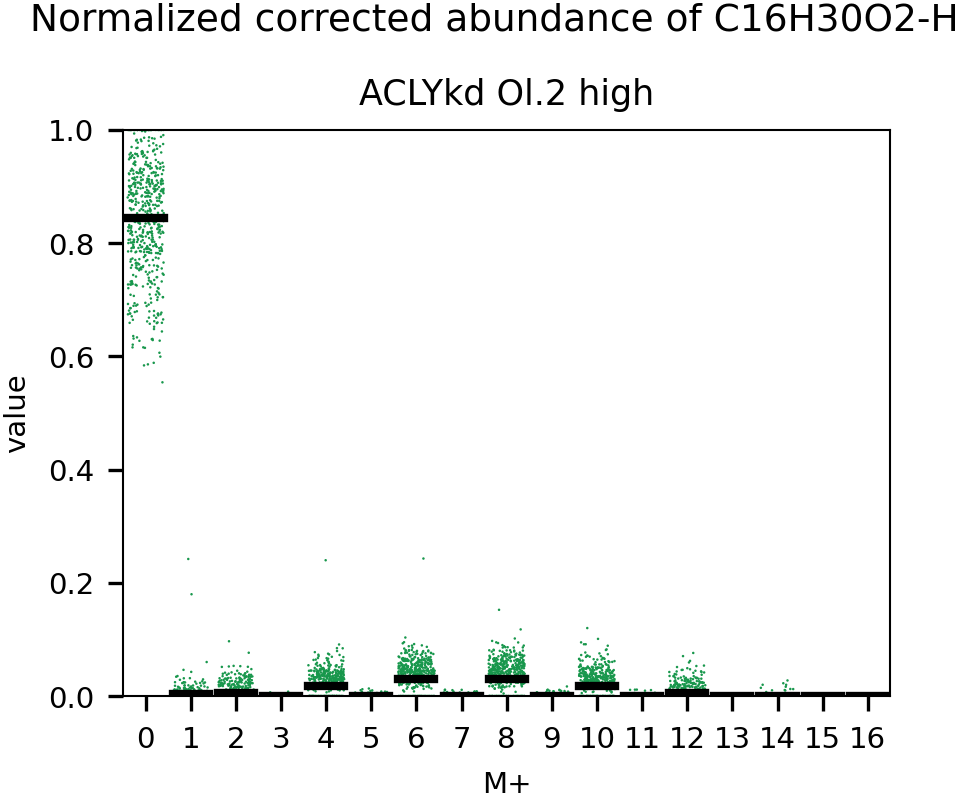

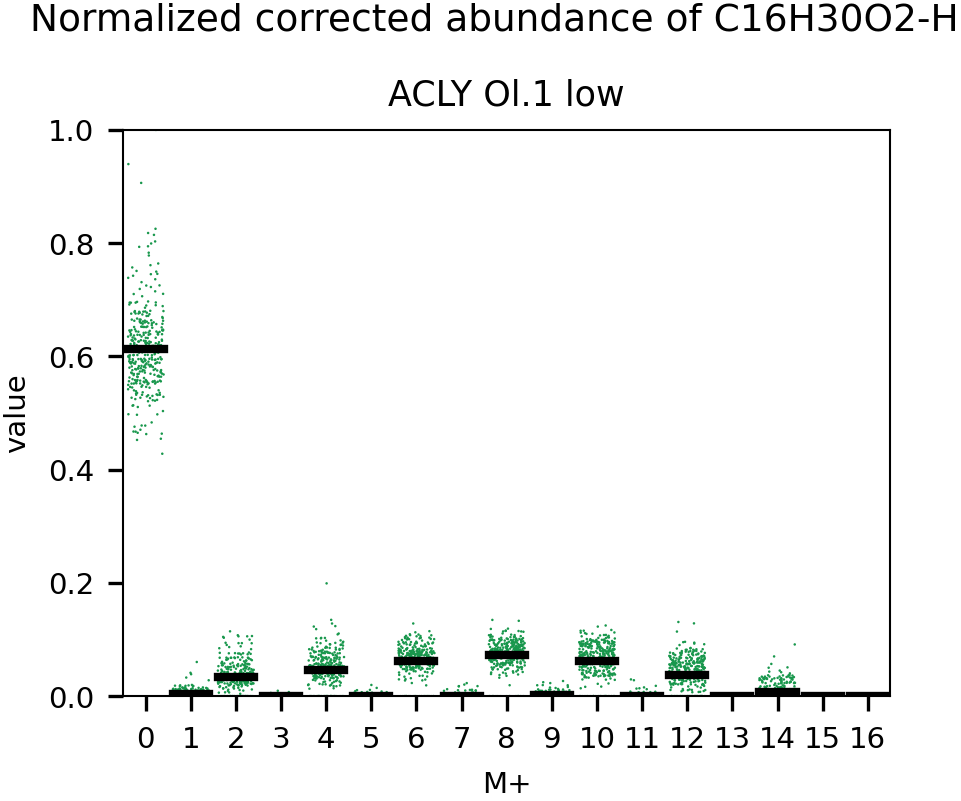

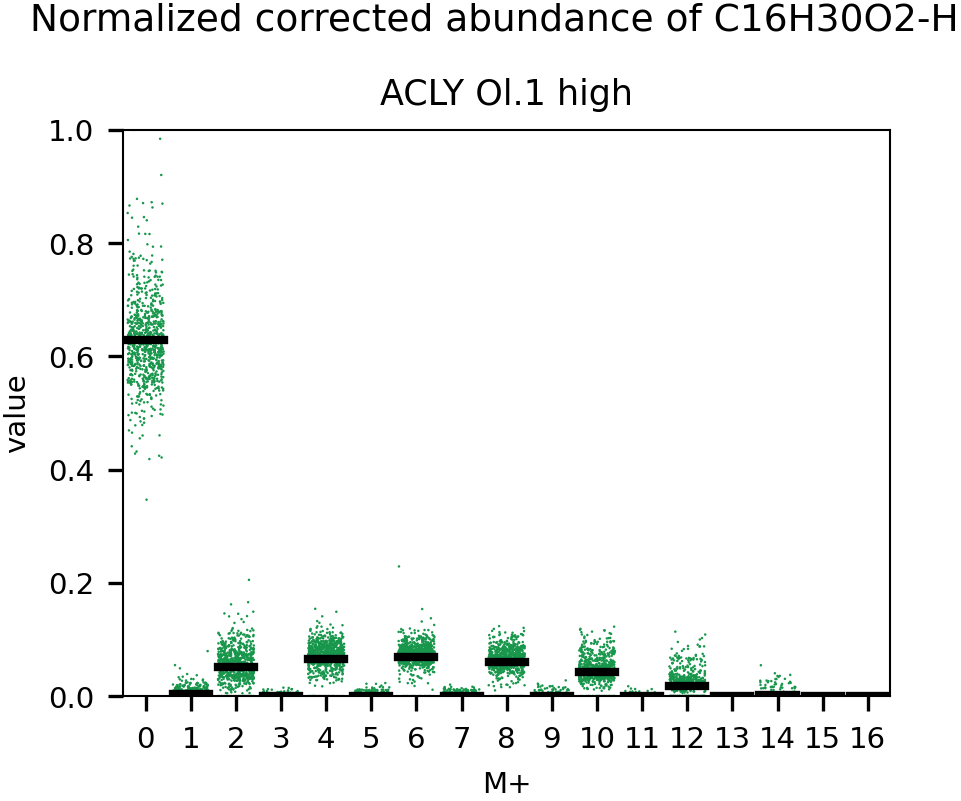

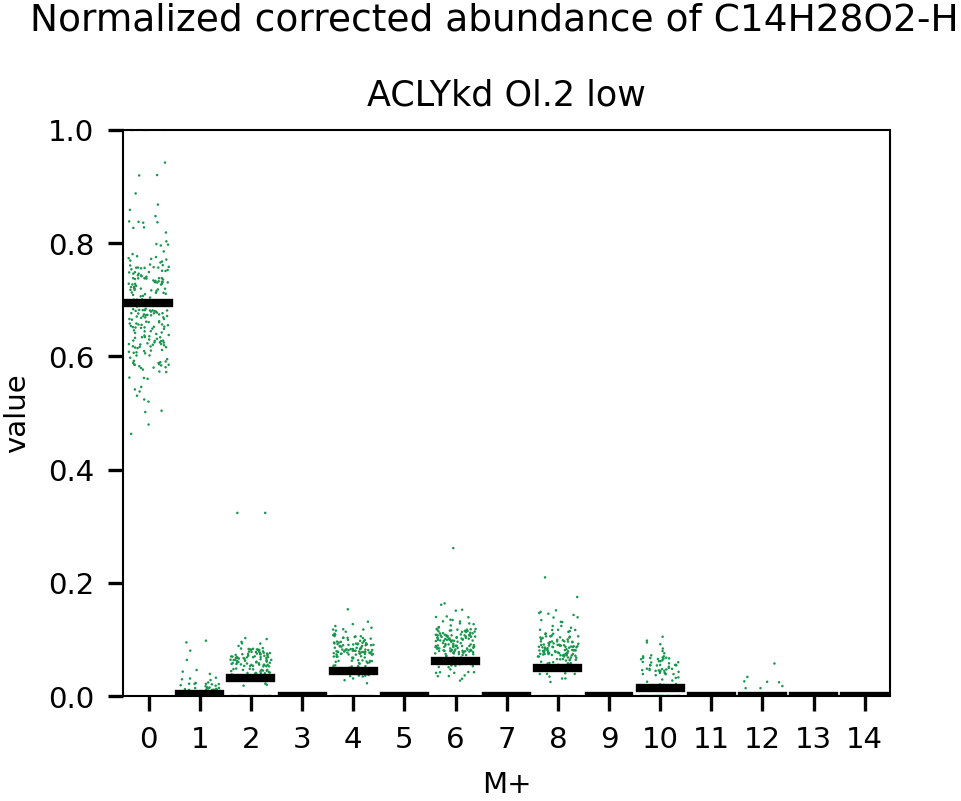

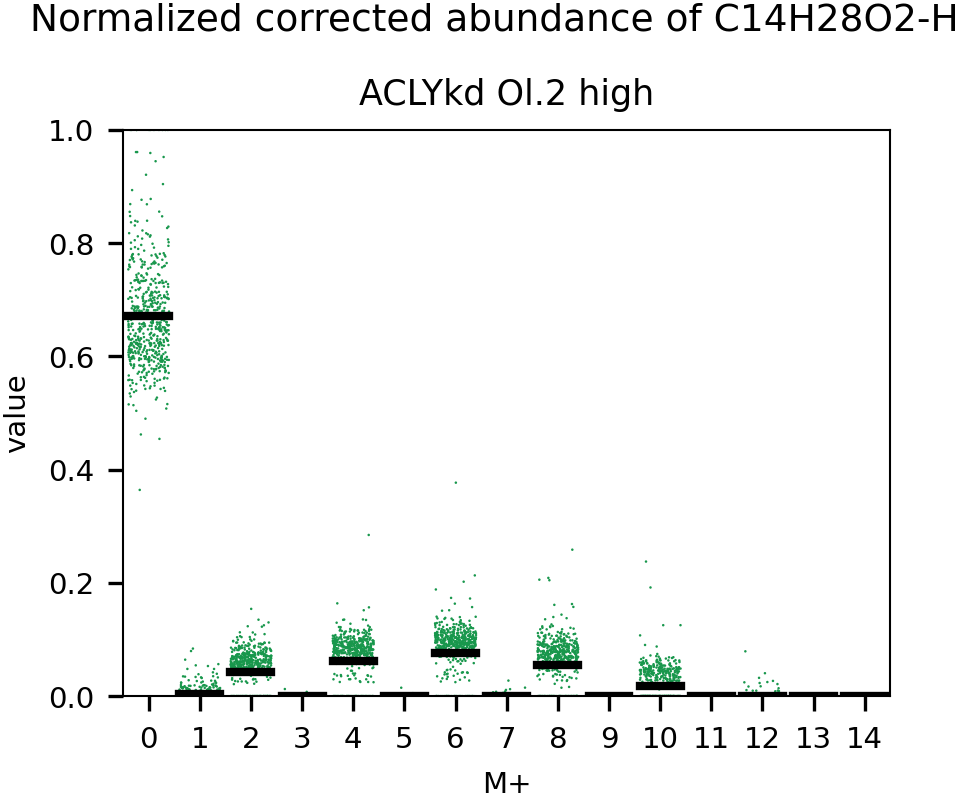

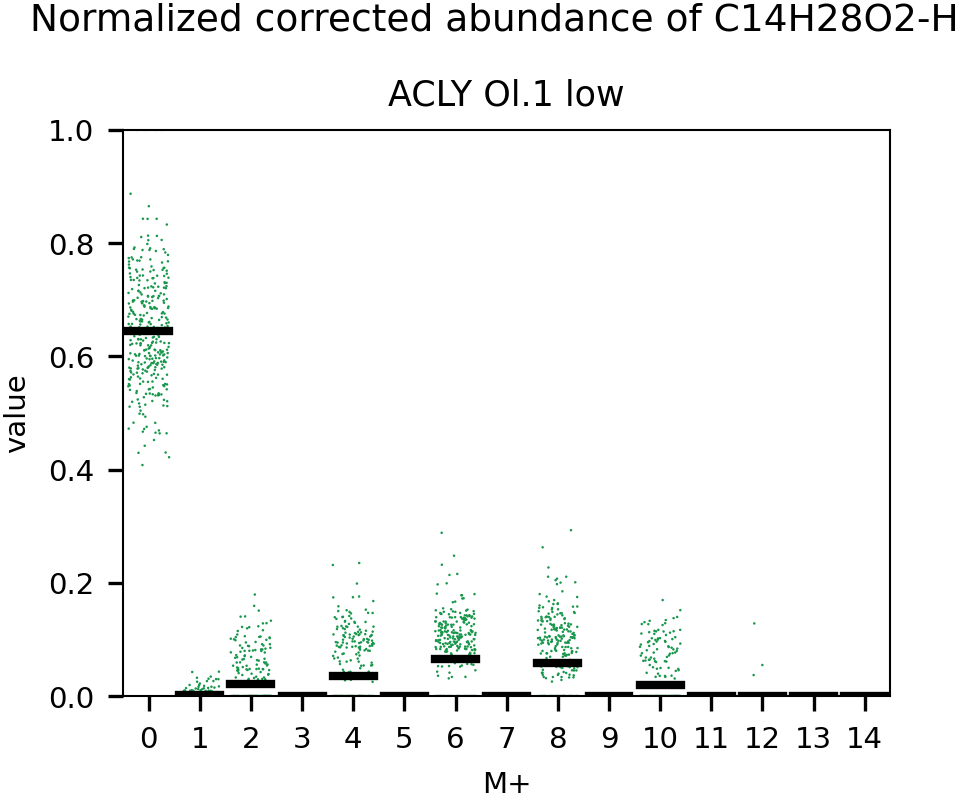

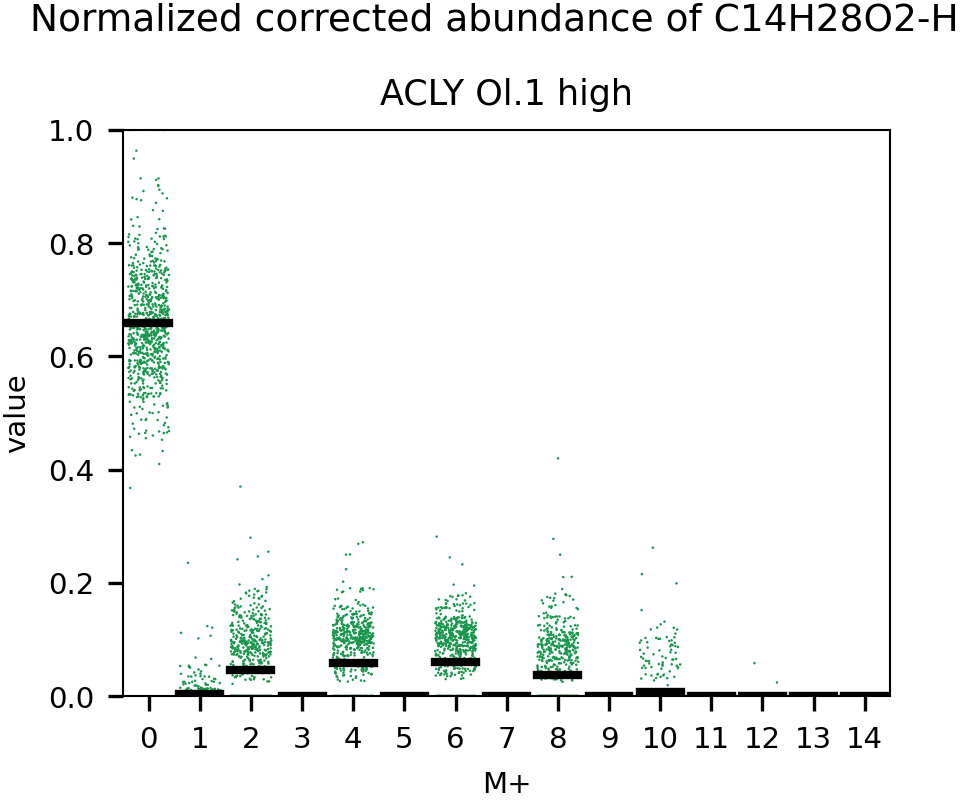

In [84]:
for idx, ion in adata.var[adata.var["M+"] == 0].iterrows():
    for cond in ['ACLYkd Ol.2 low', 'ACLYkd Ol.2 high','ACLY Ol.1 low', 'ACLY Ol.1 high']:
        adata_cond = adata[(adata.obs["GFP and condition"] == cond) & (adata.obs.growthConditions == "Labeled")]
        ion_stripplot_bulk(adata_cond, ion.unlabeled_annotation_id)
        plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
        plt.title(cond)
        plt.savefig(plots_path / ("bulk_comparison_%s_%s_labeled.png"%(cond.replace(" ", "-"), ion.unlabeled_annotation_id)))
        plt.savefig(plots_path / ("bulk_comparison_%s_%s_labeled.svg"%(cond.replace(" ", "-"), ion.unlabeled_annotation_id)))
        plt.show()

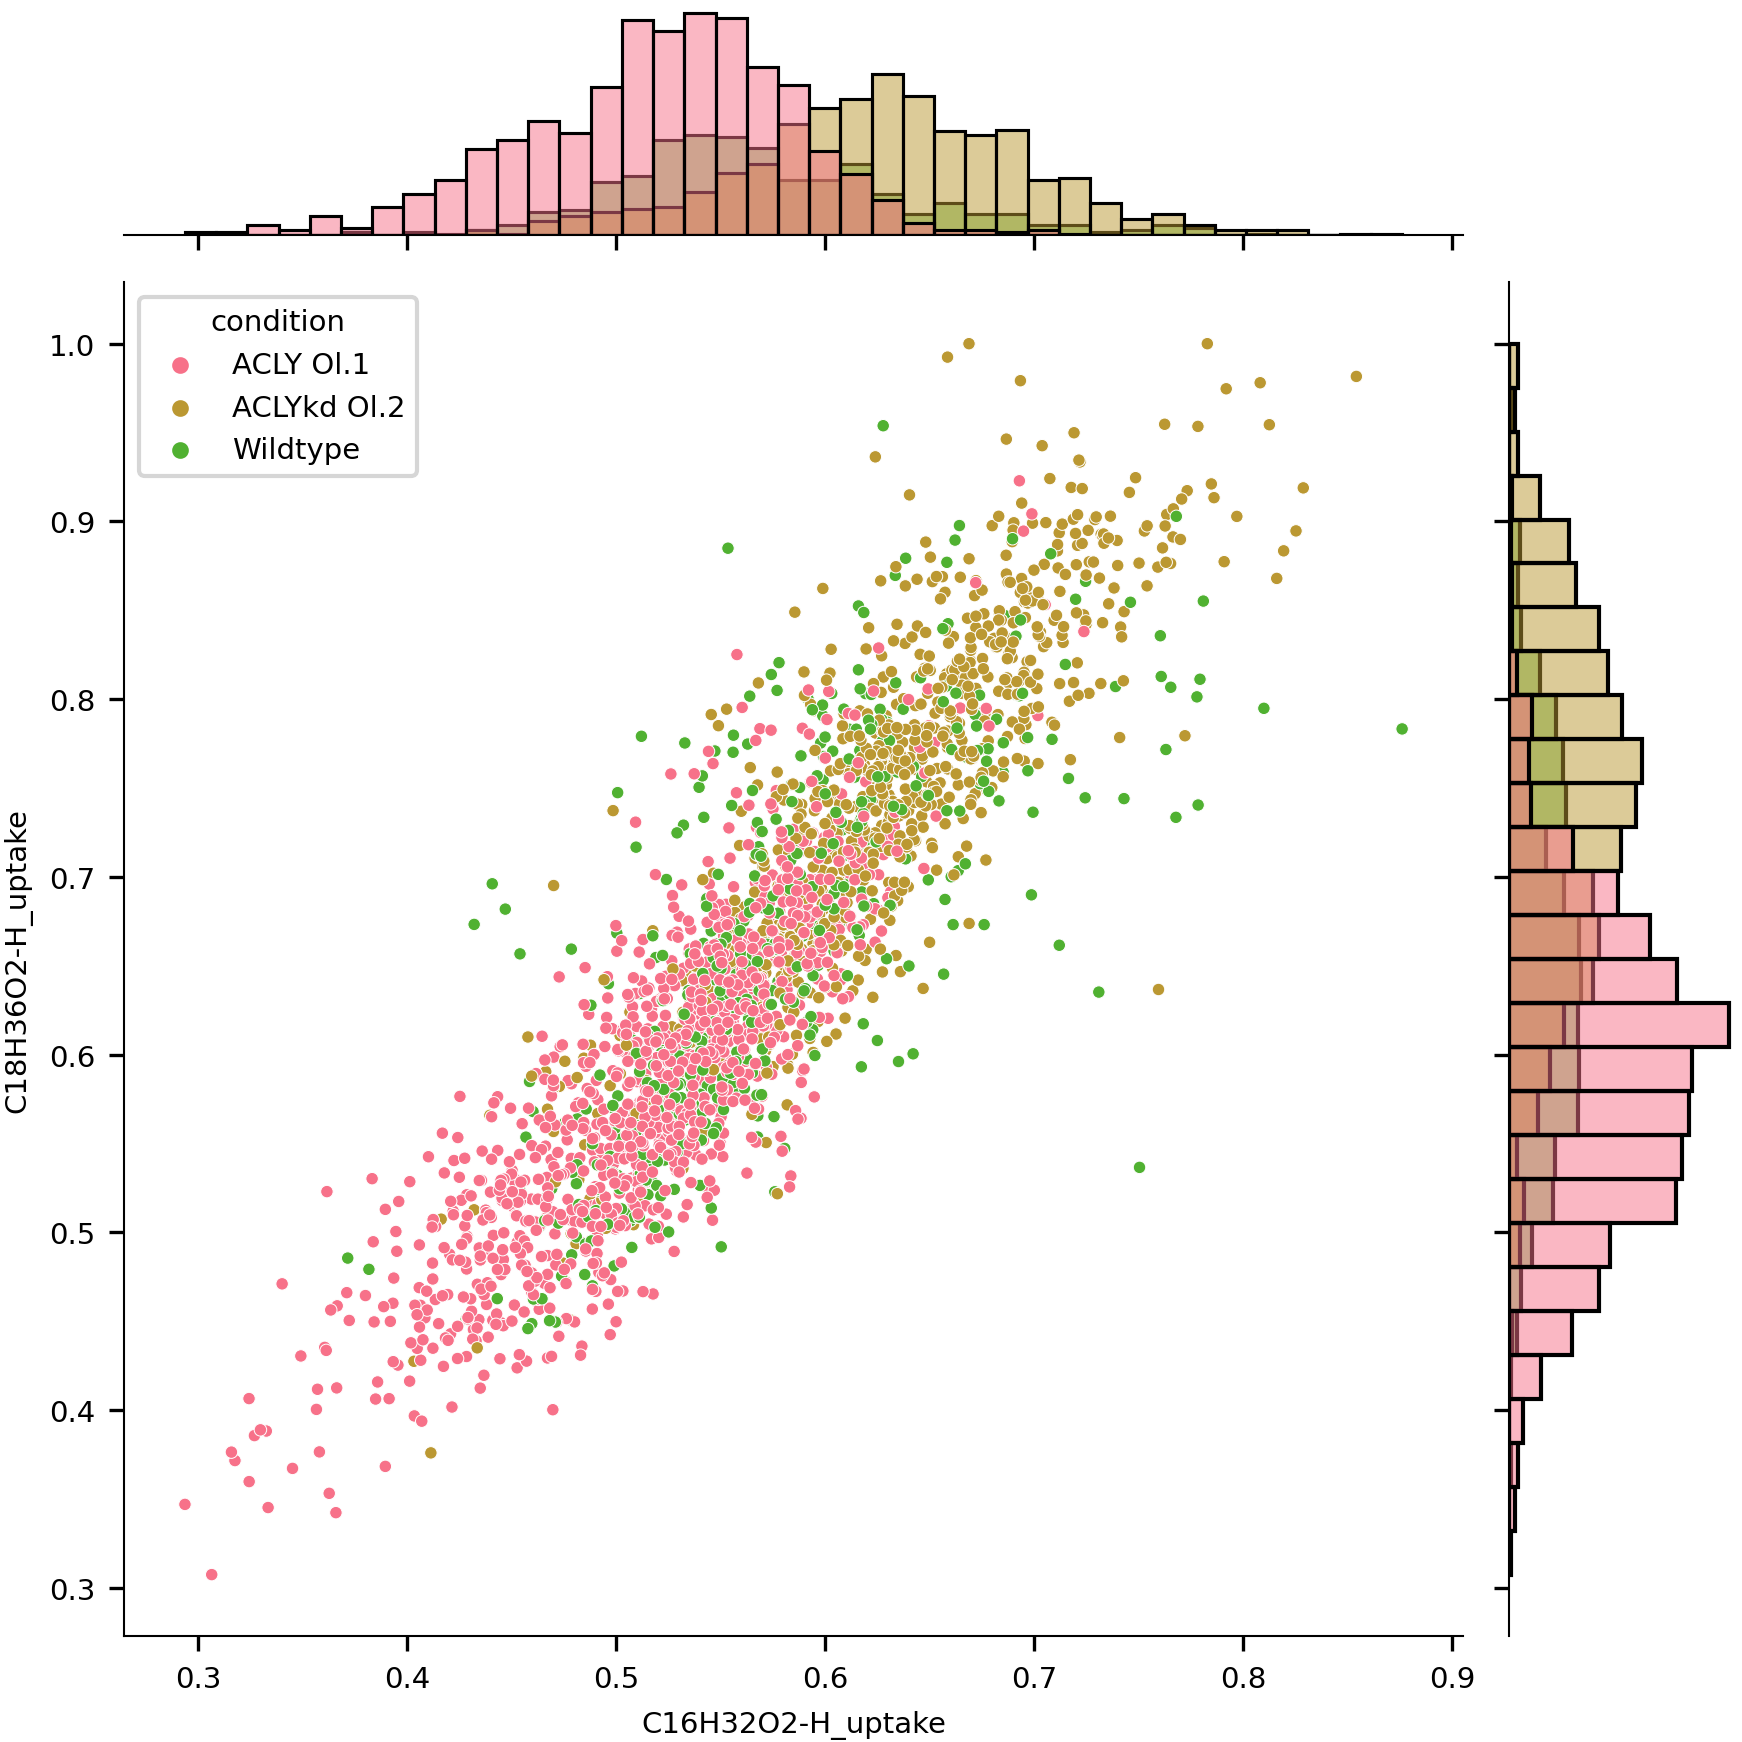

In [7]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))


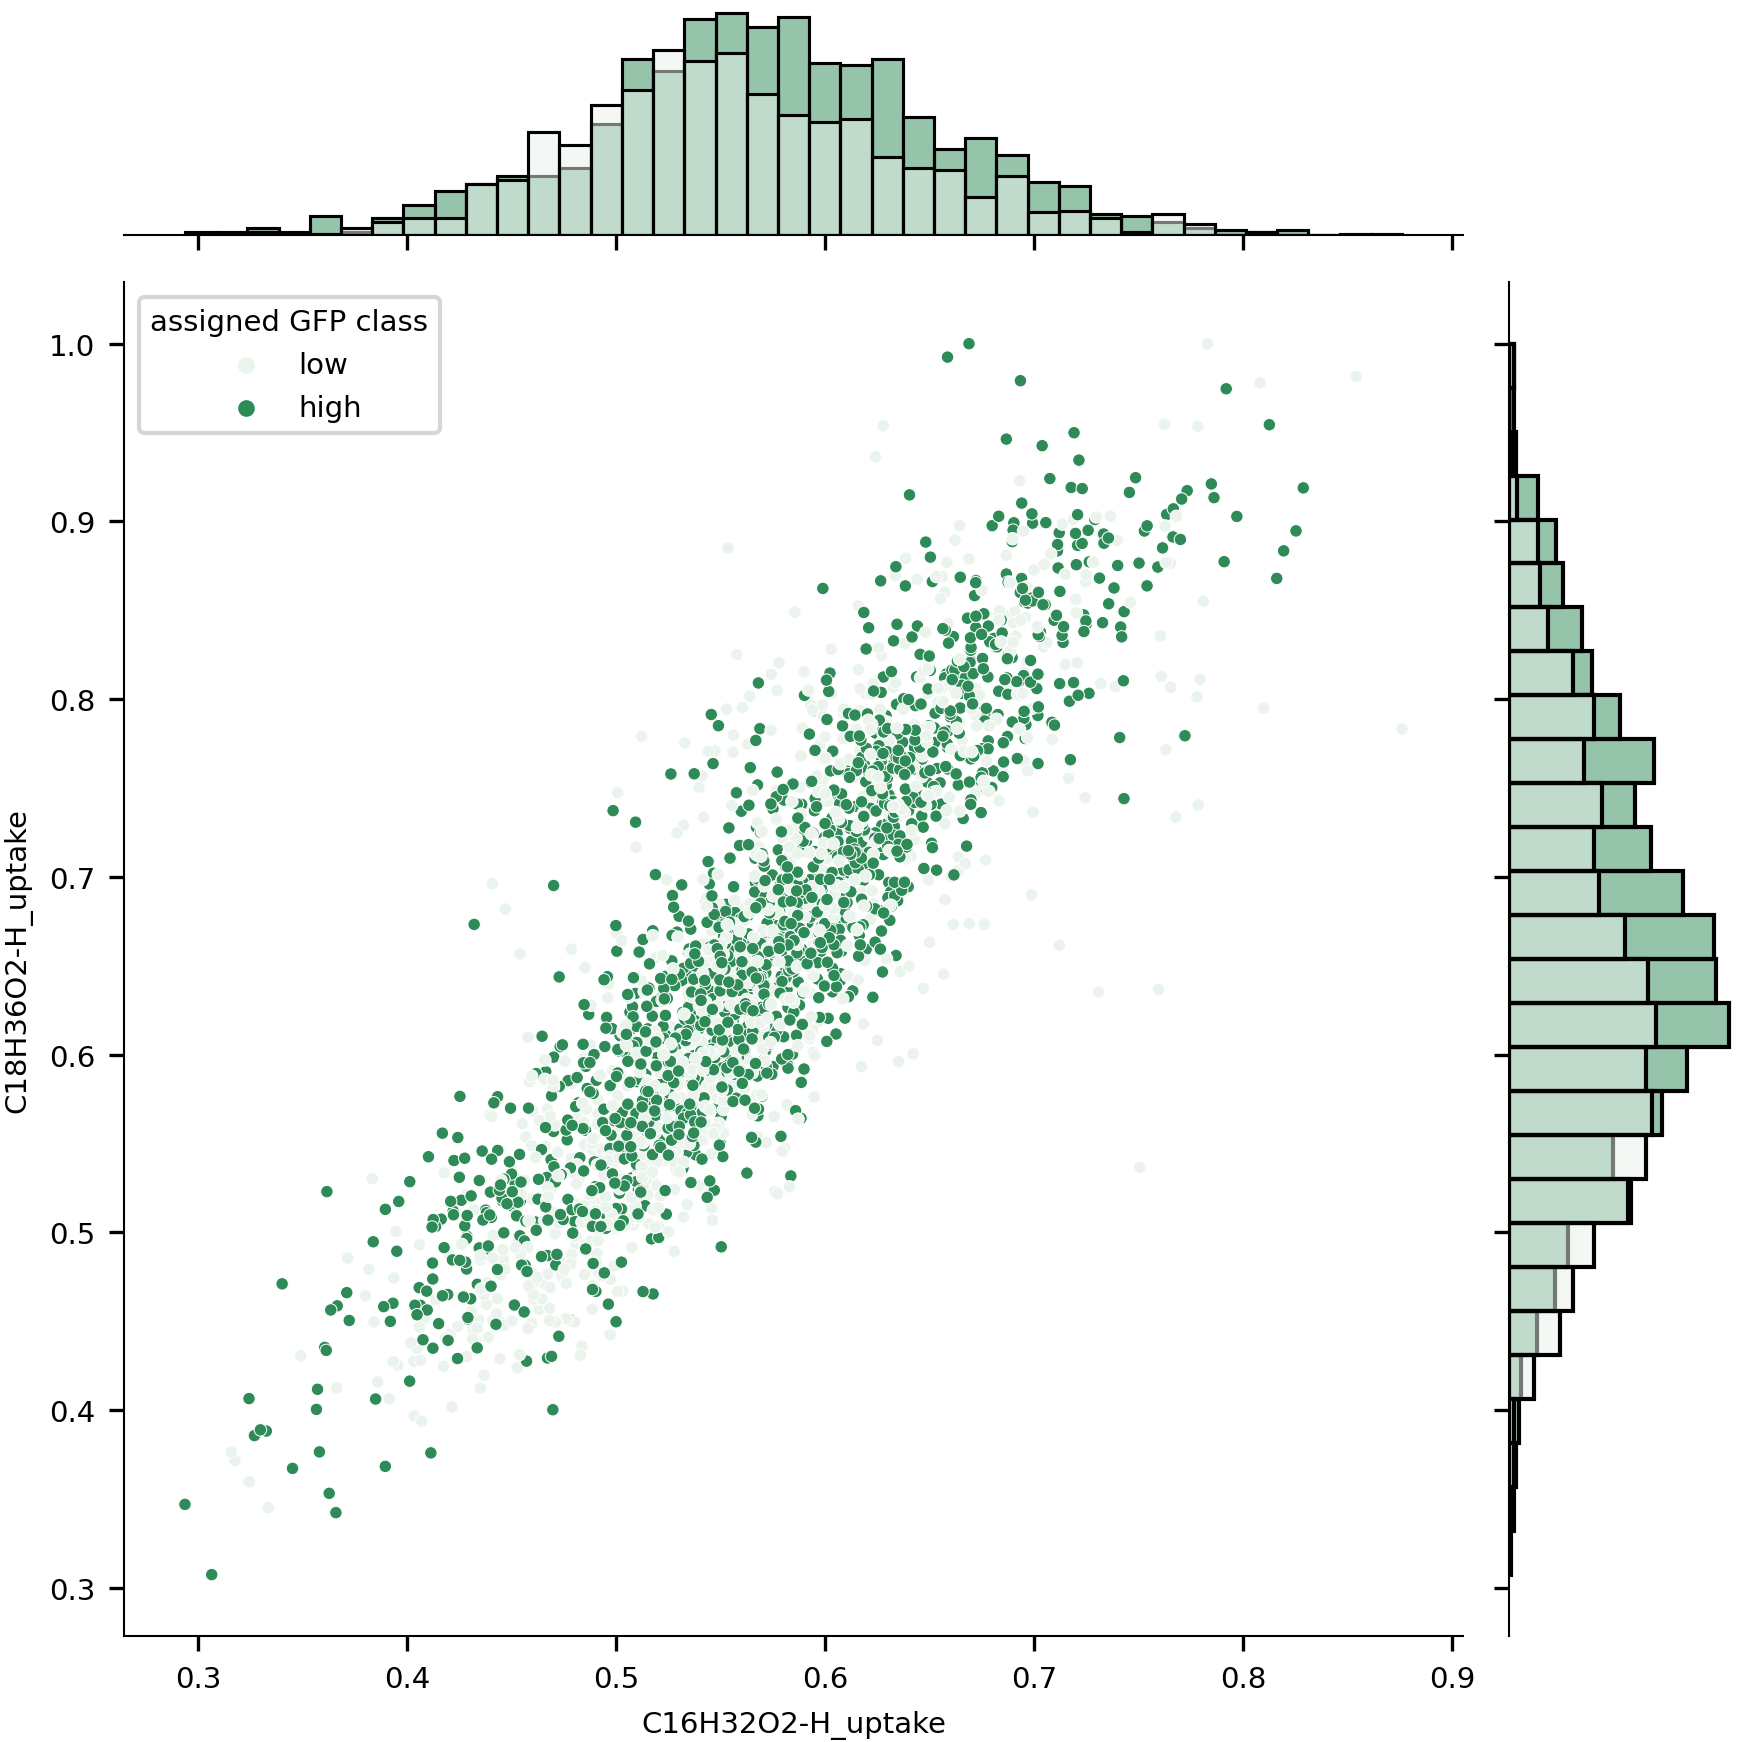

In [8]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

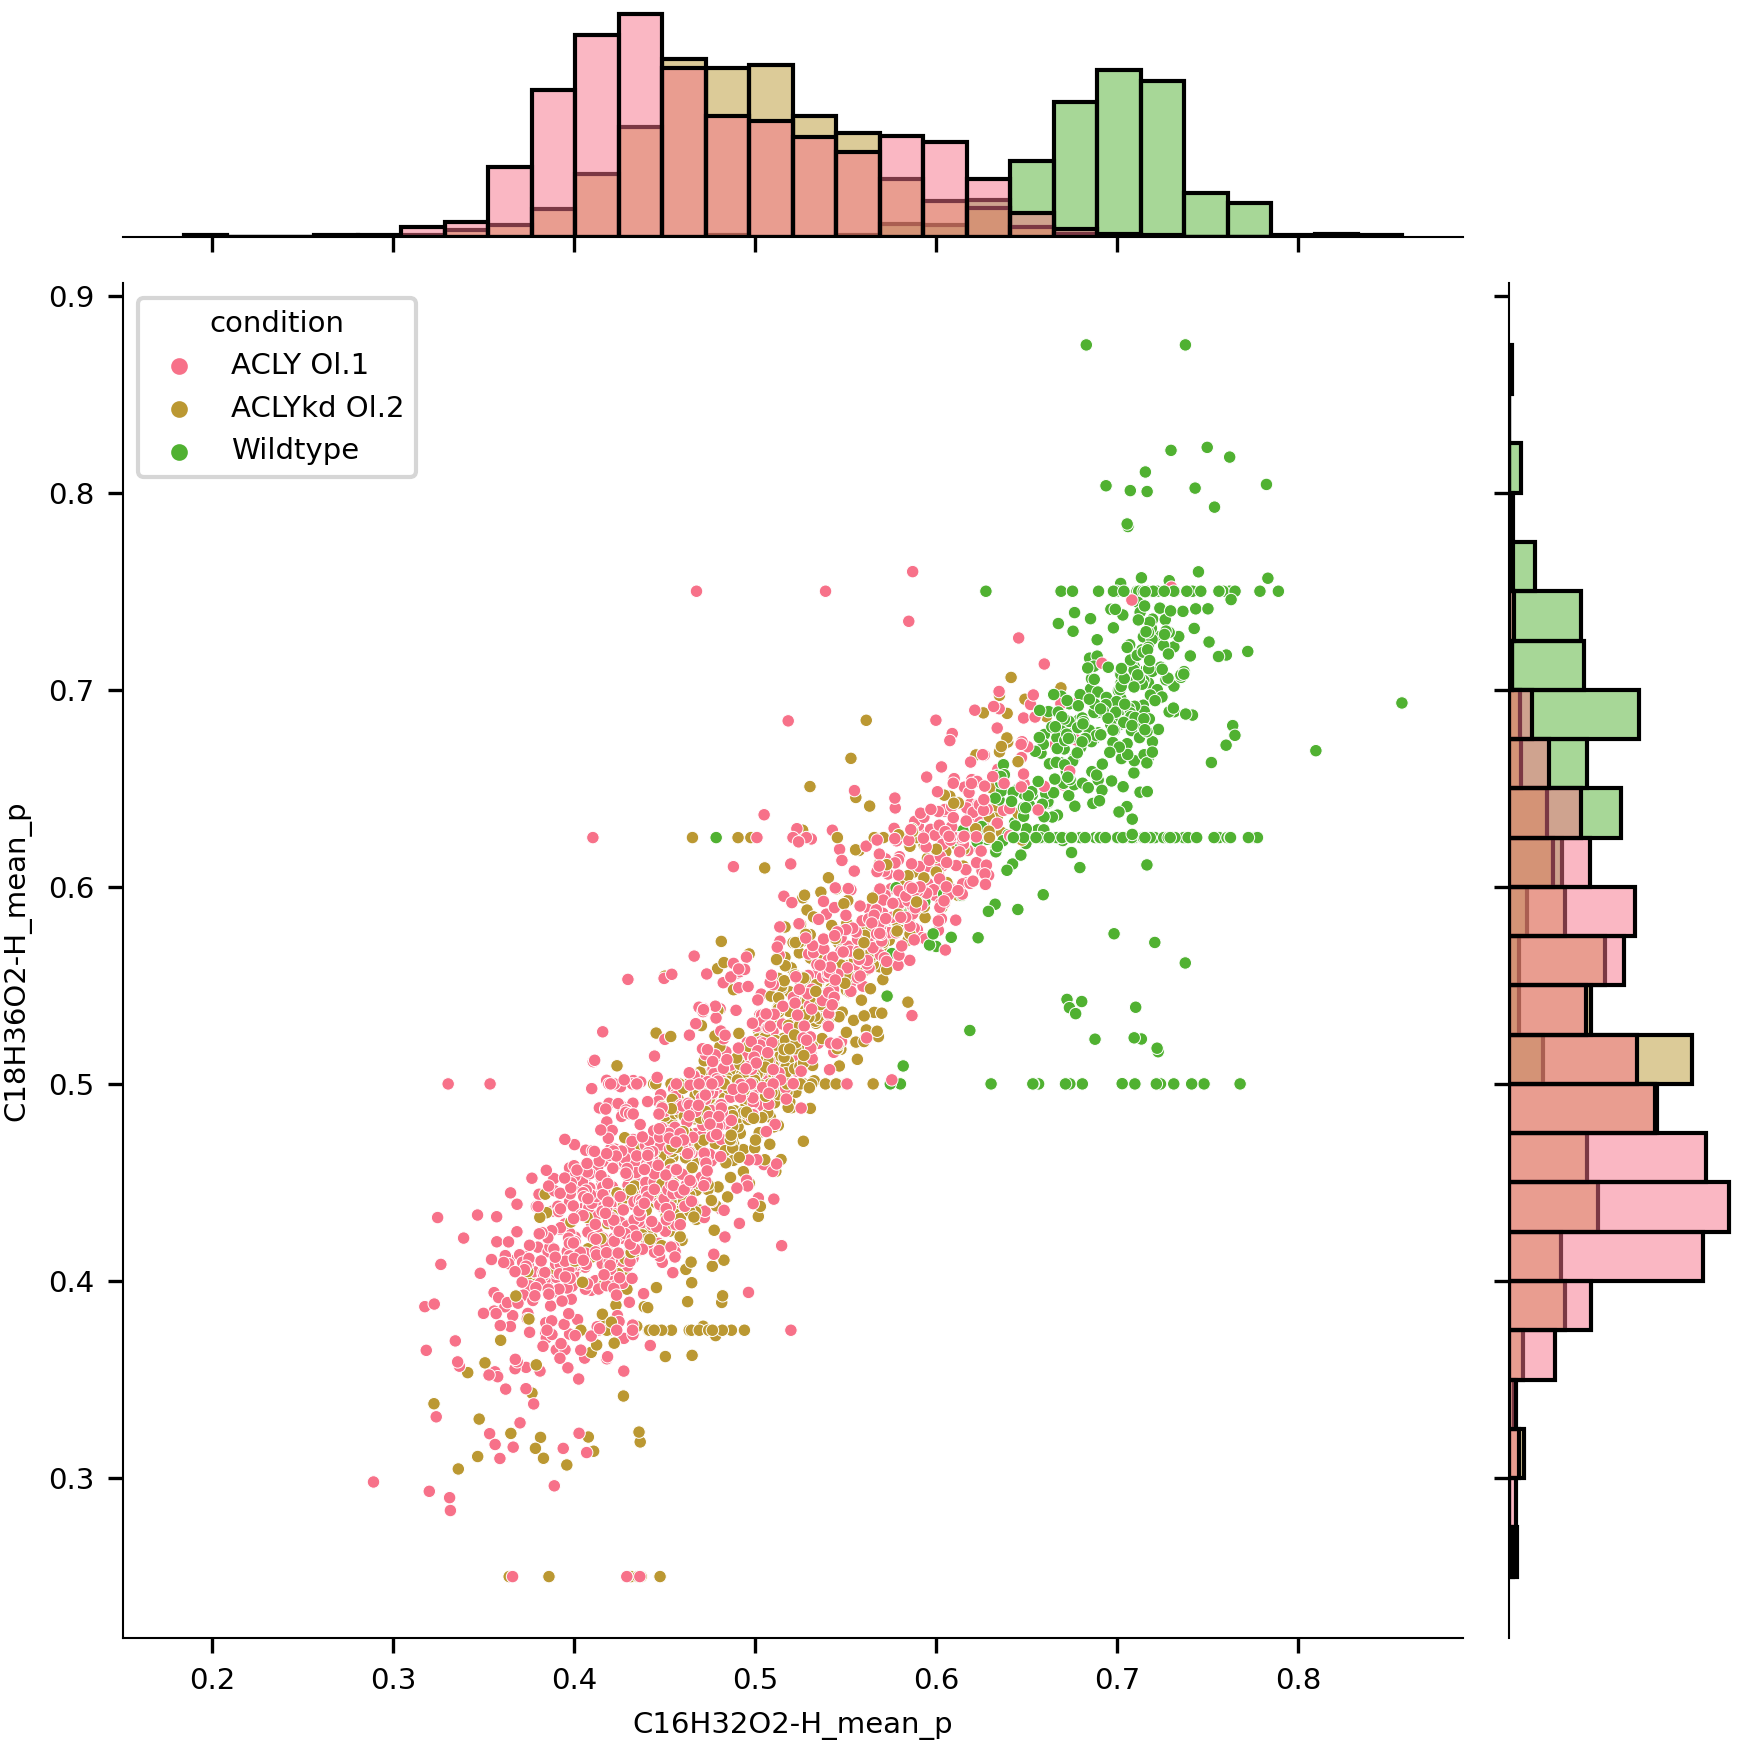

In [70]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_mean_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_condition_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_condition_%s_%s.svg"%(x_col, y_col)))

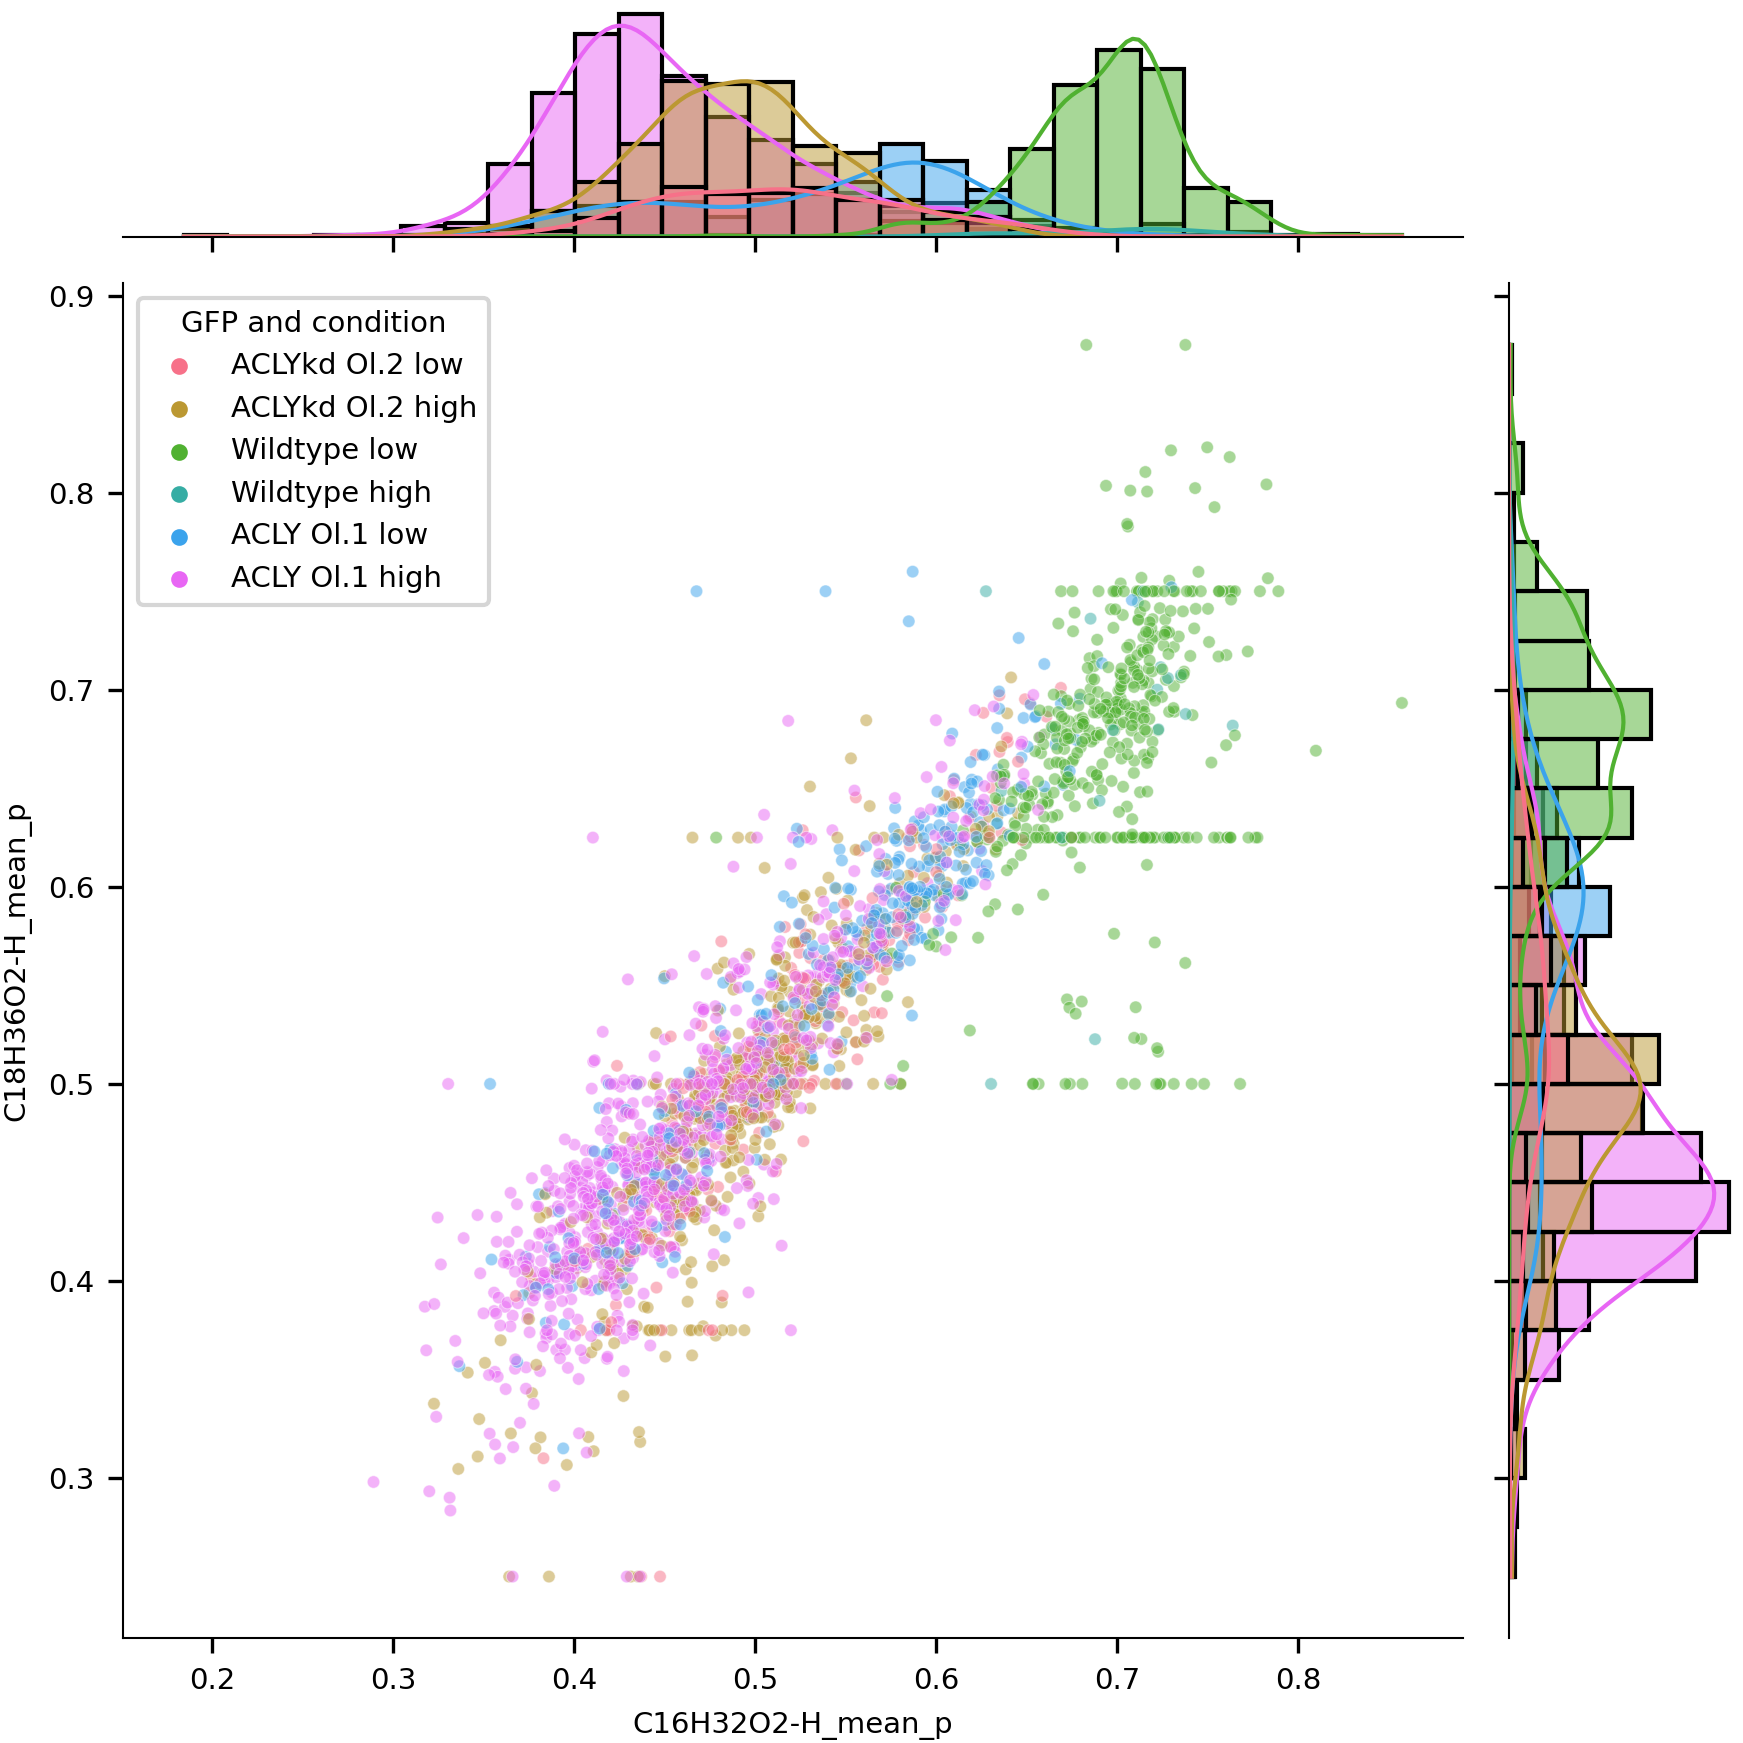

In [82]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_mean_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="GFP and condition")
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot, kde=True)

plt.savefig(plots_path / ("separate_gfp_condition_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_gfp_condition_%s_%s.svg"%(x_col, y_col)))

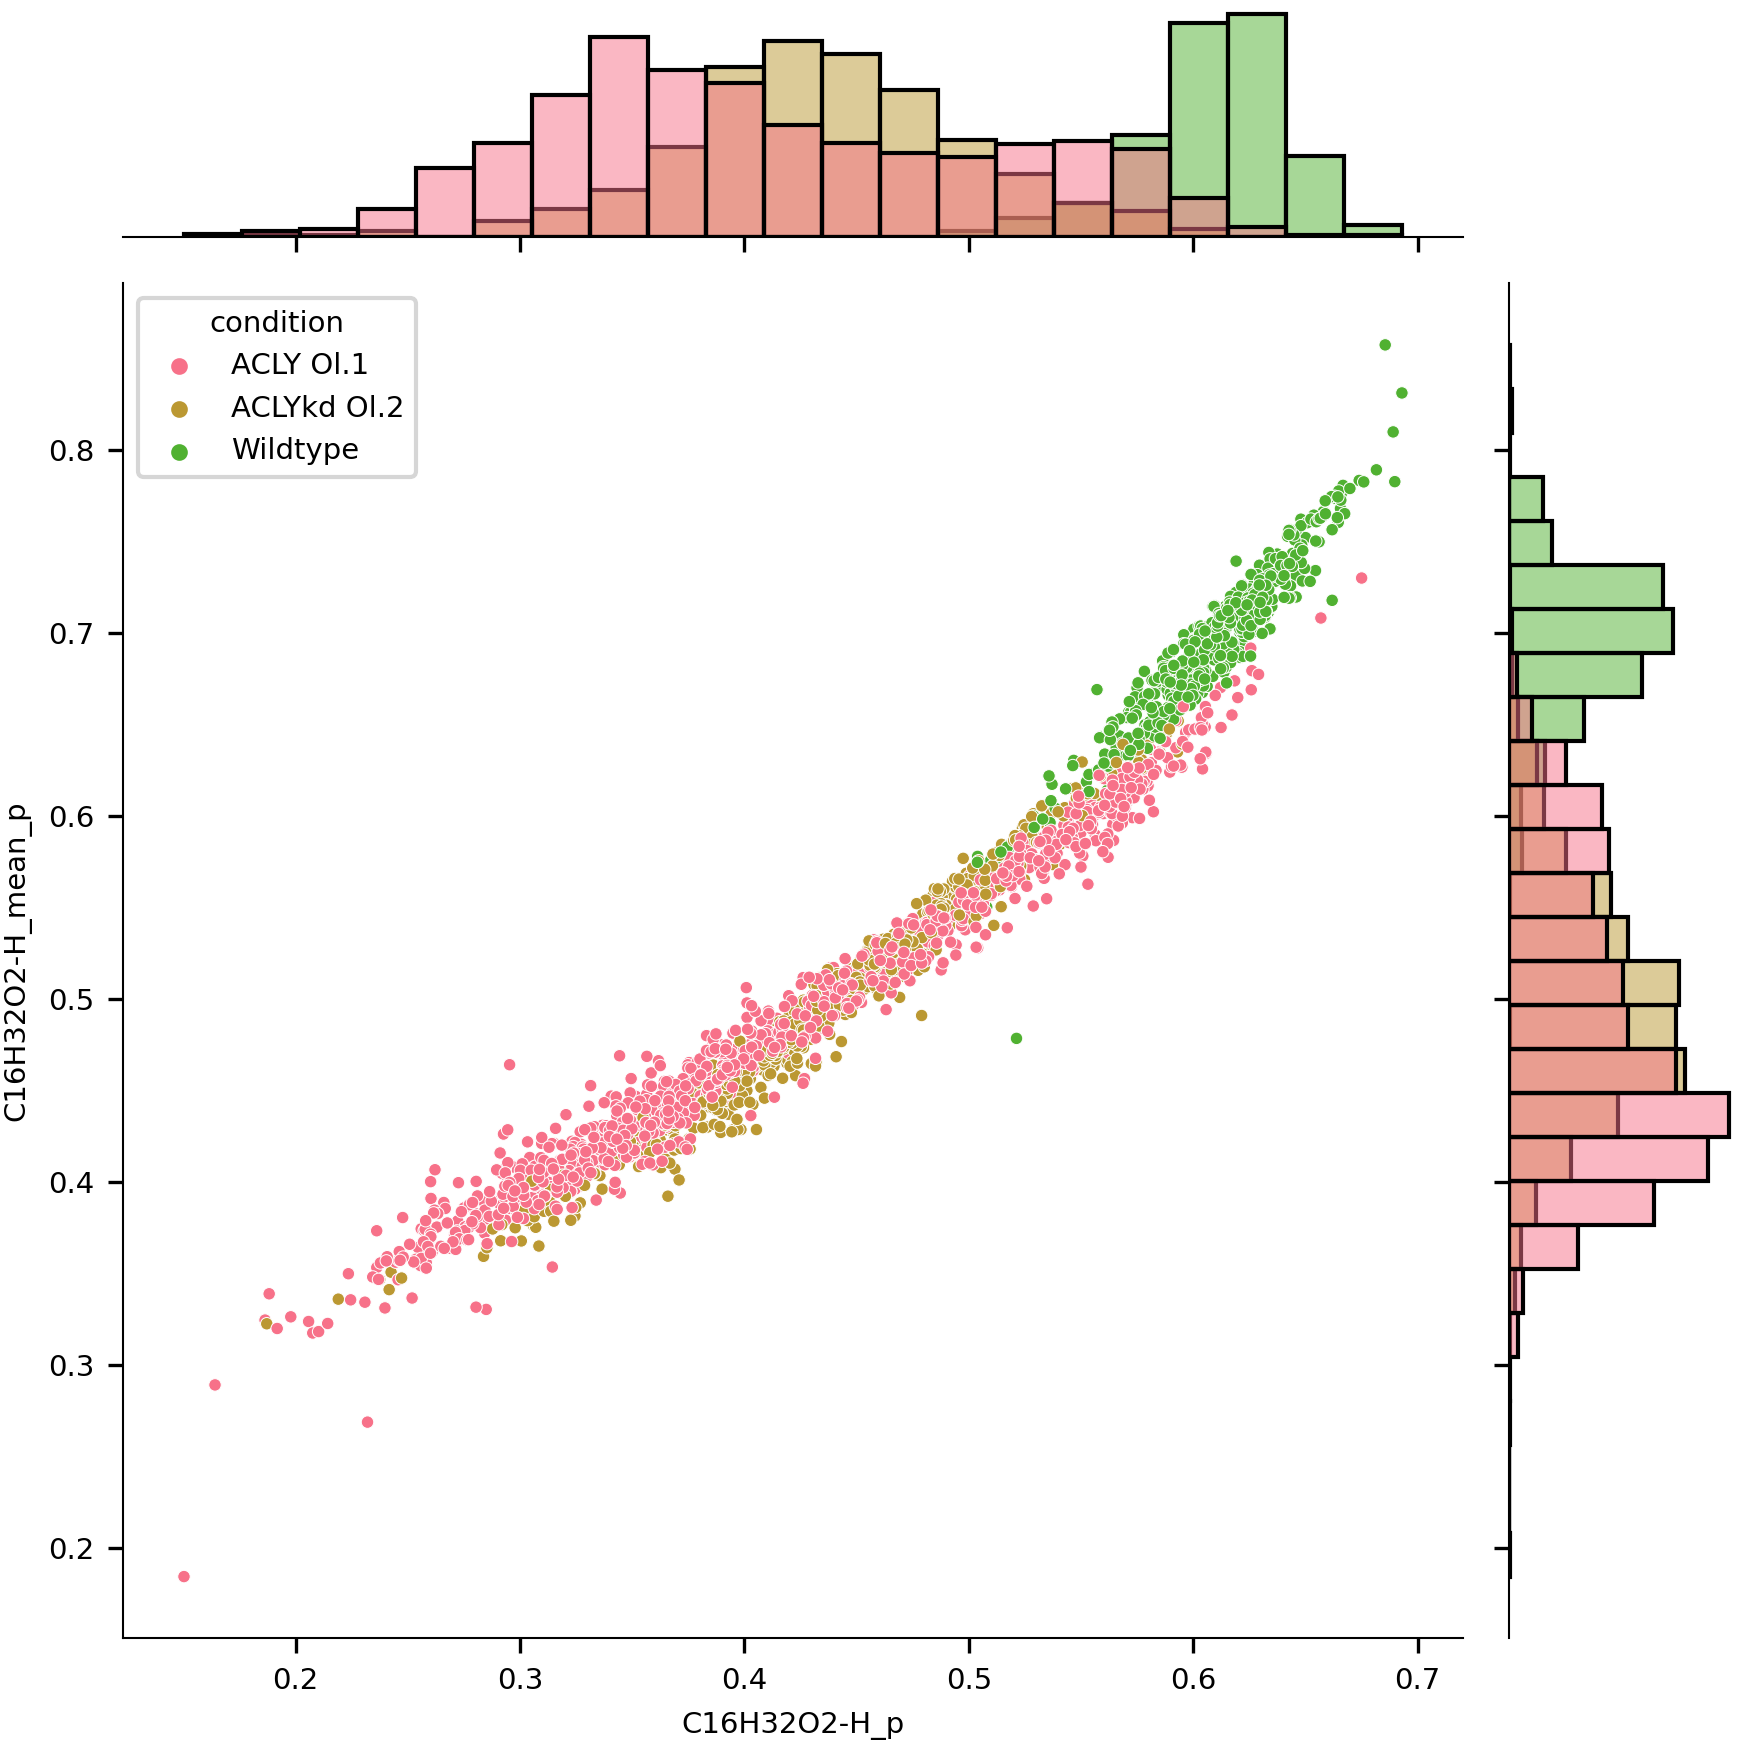

In [10]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_p'
y_col = 'C16H32O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

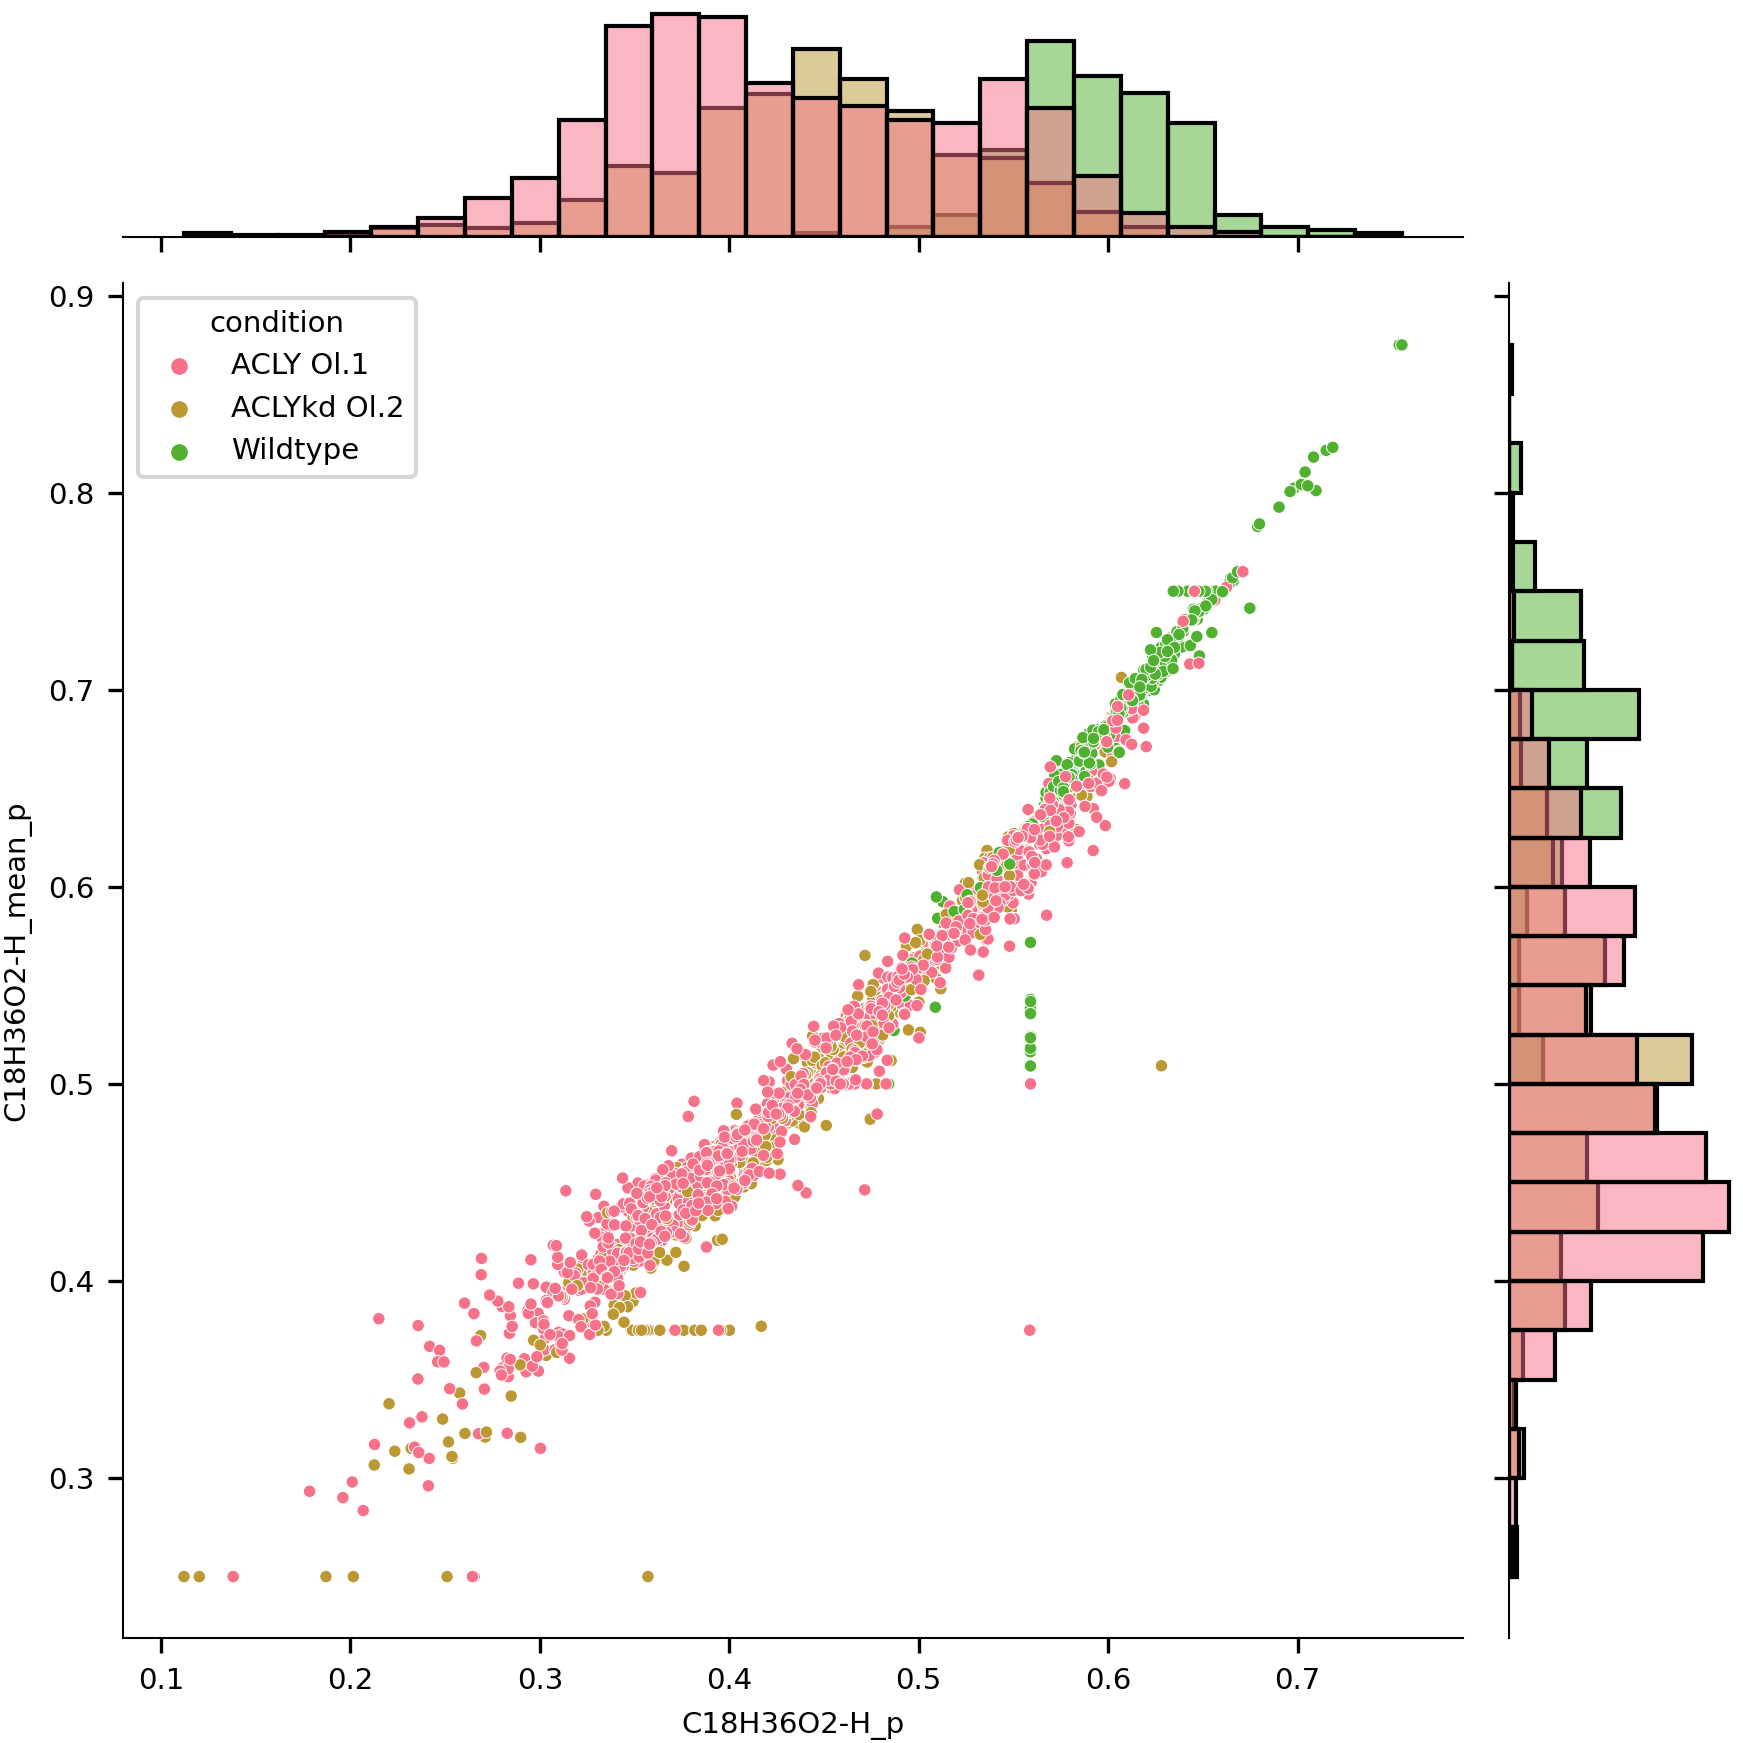

In [17]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C18H36O2-H_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

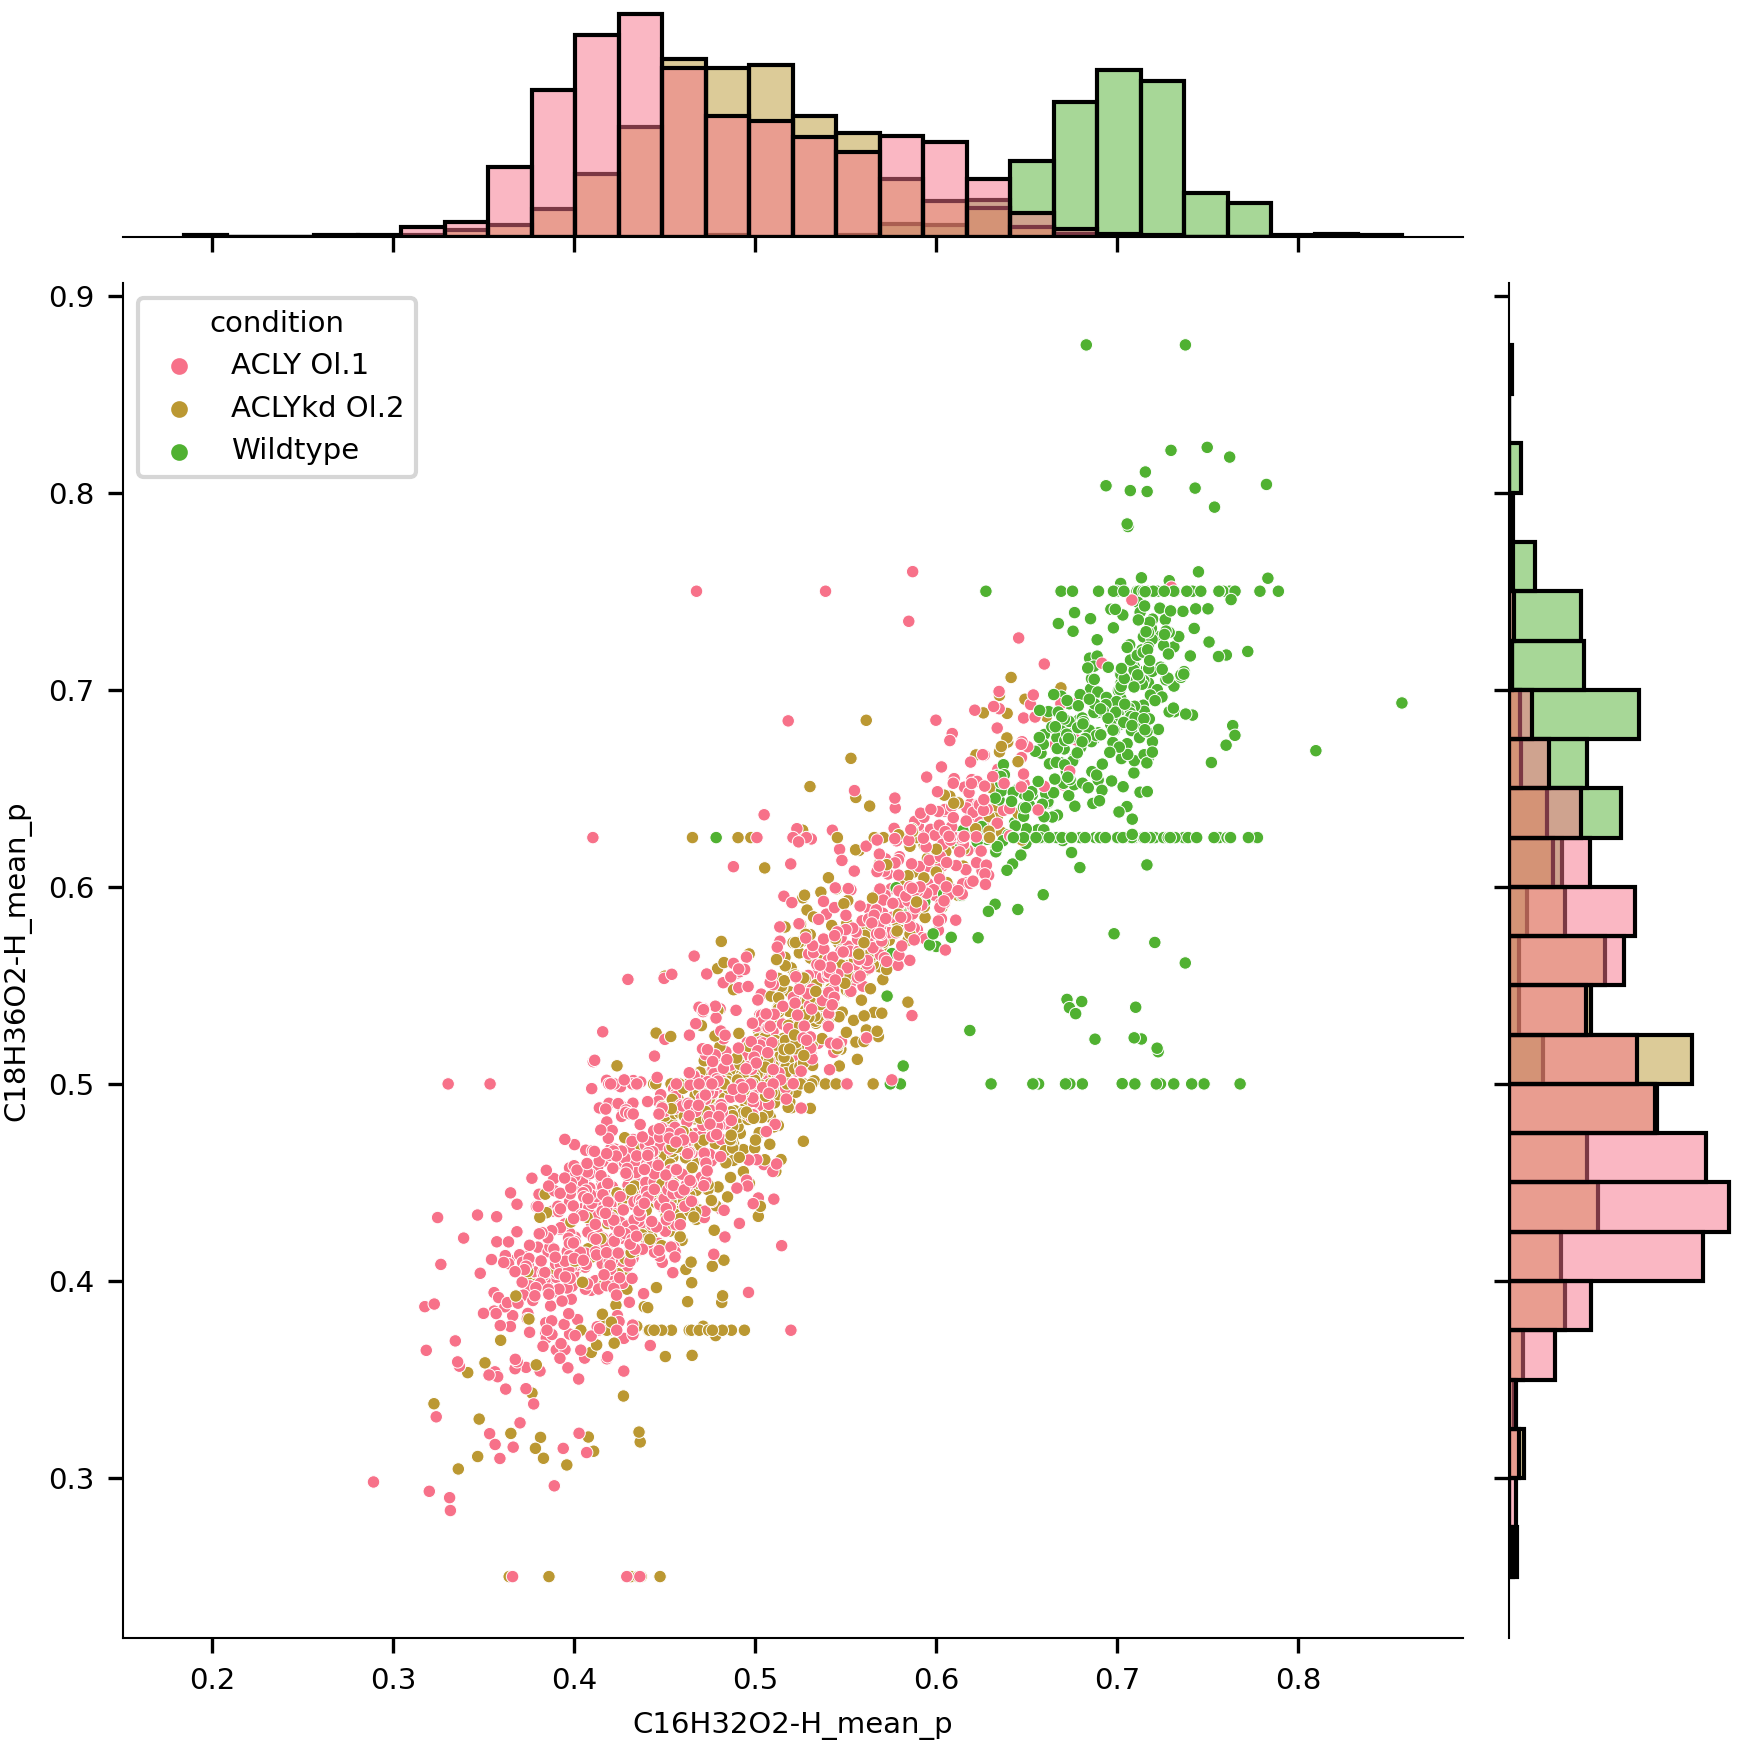

In [13]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_mean_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='condition')
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("mixture_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s.svg"%(x_col, y_col)))

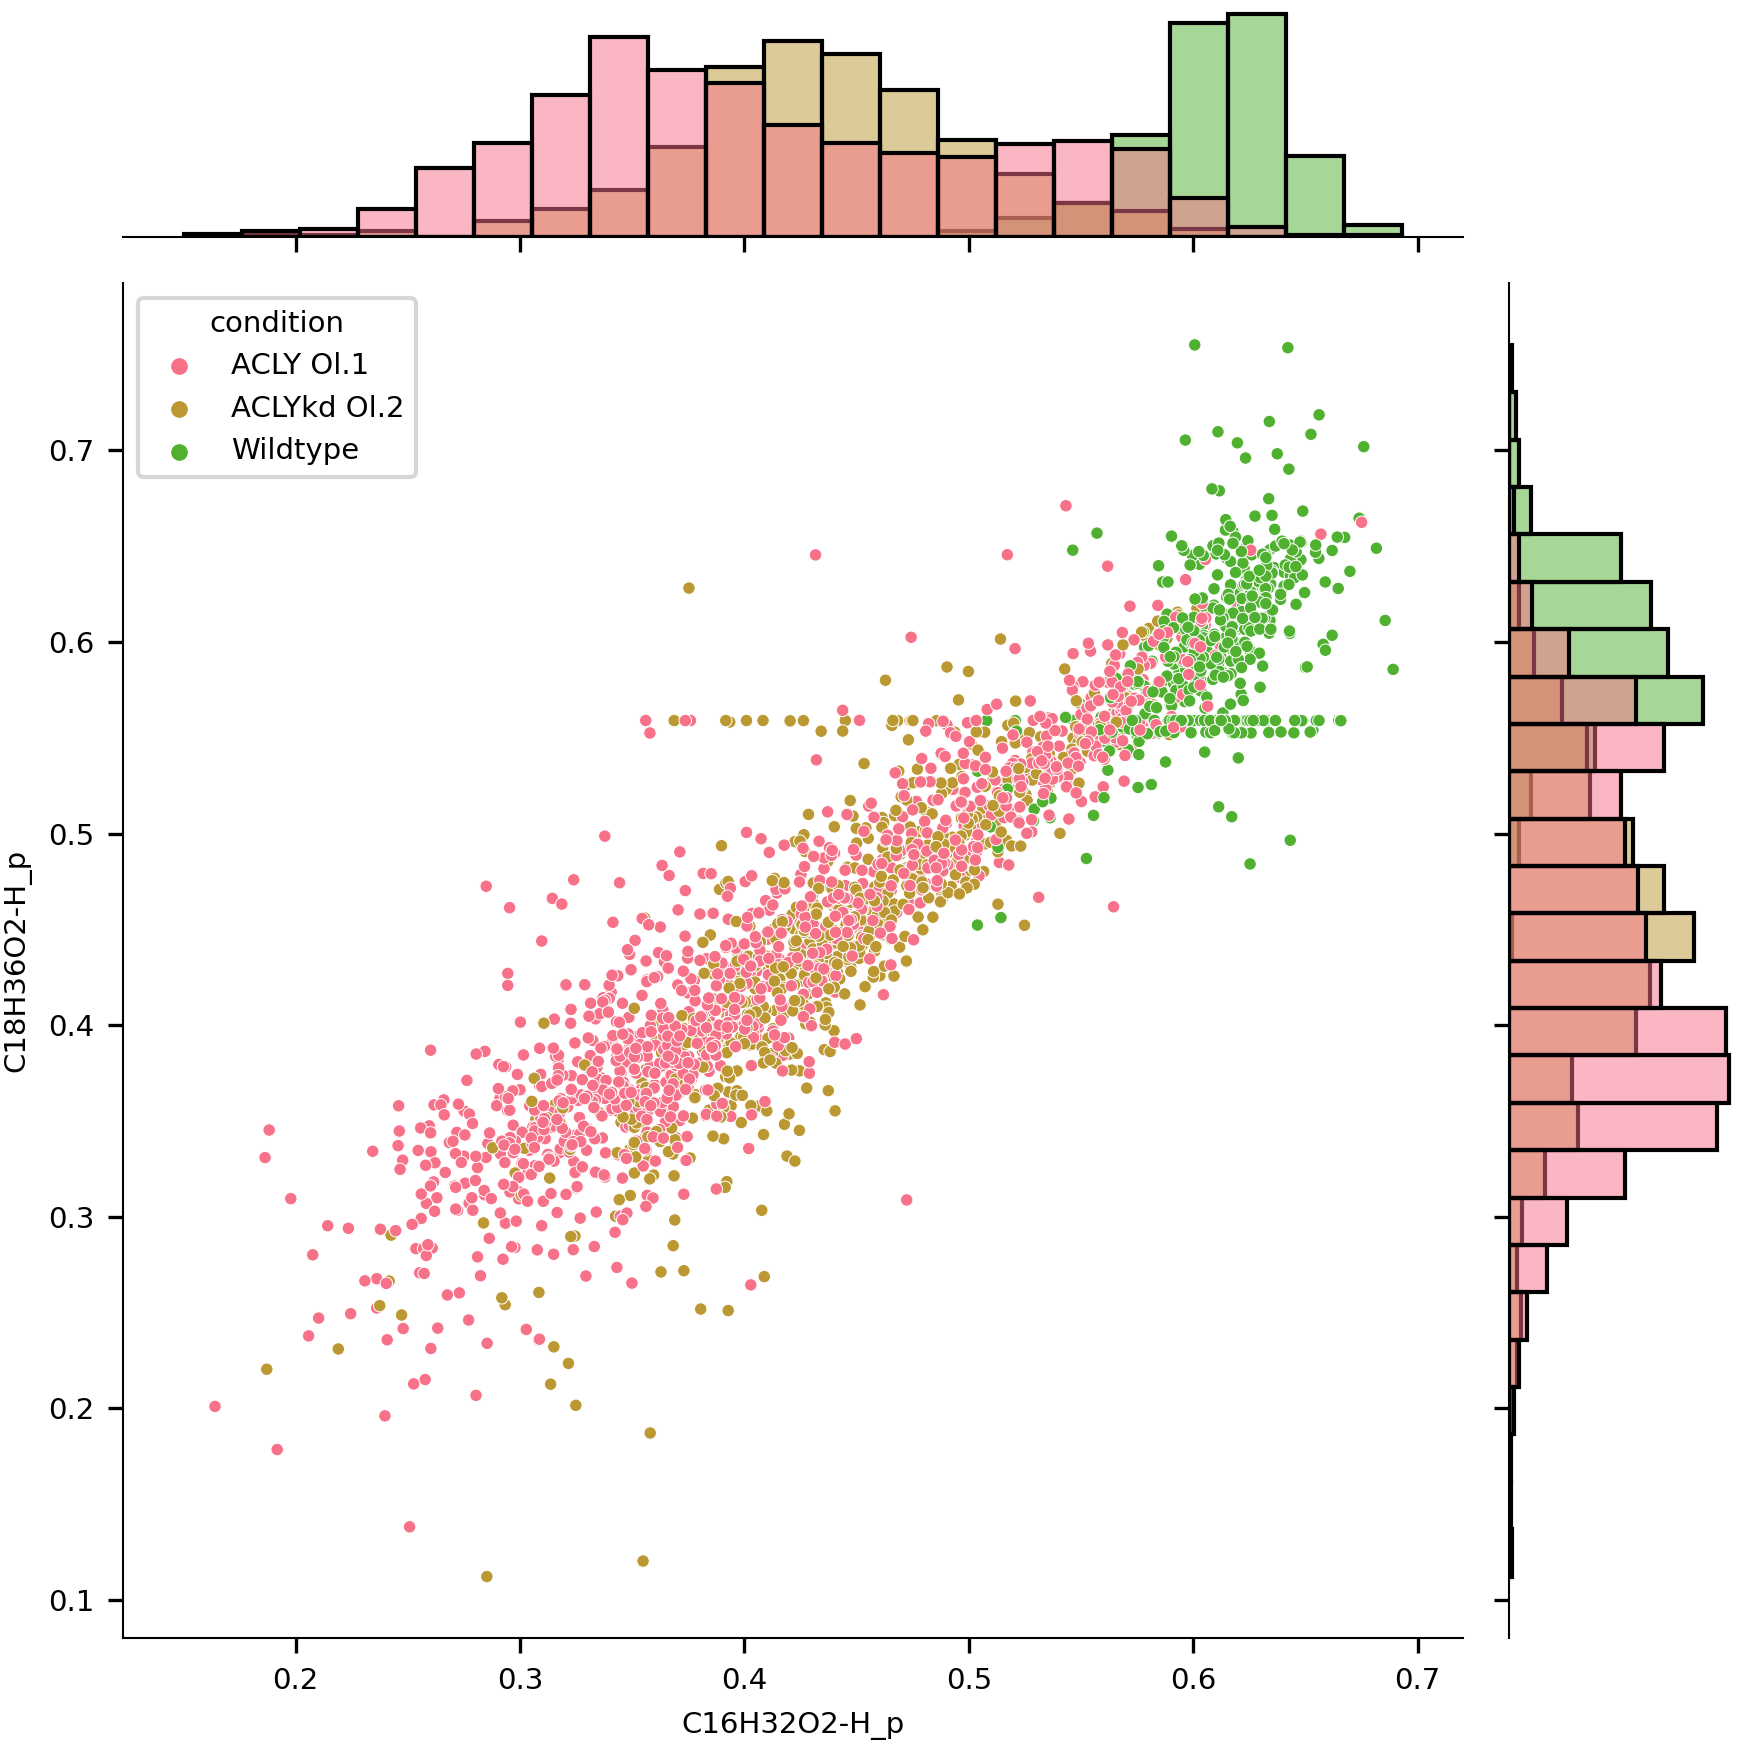

In [14]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_p'
y_col = 'C18H36O2-H_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='condition')
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("mixture_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s.svg"%(x_col, y_col)))

## Mixture, but different oligos separately

In [16]:
adata.obs.condition.value_counts()

ACLY Ol.1 + Wildtype      1598
Wildtype                  1346
ACLYkd Ol.2 + Wildtype    1296
ACLY Ol.1                 1180
ACLYkd Ol.2                837
Name: condition, dtype: int64

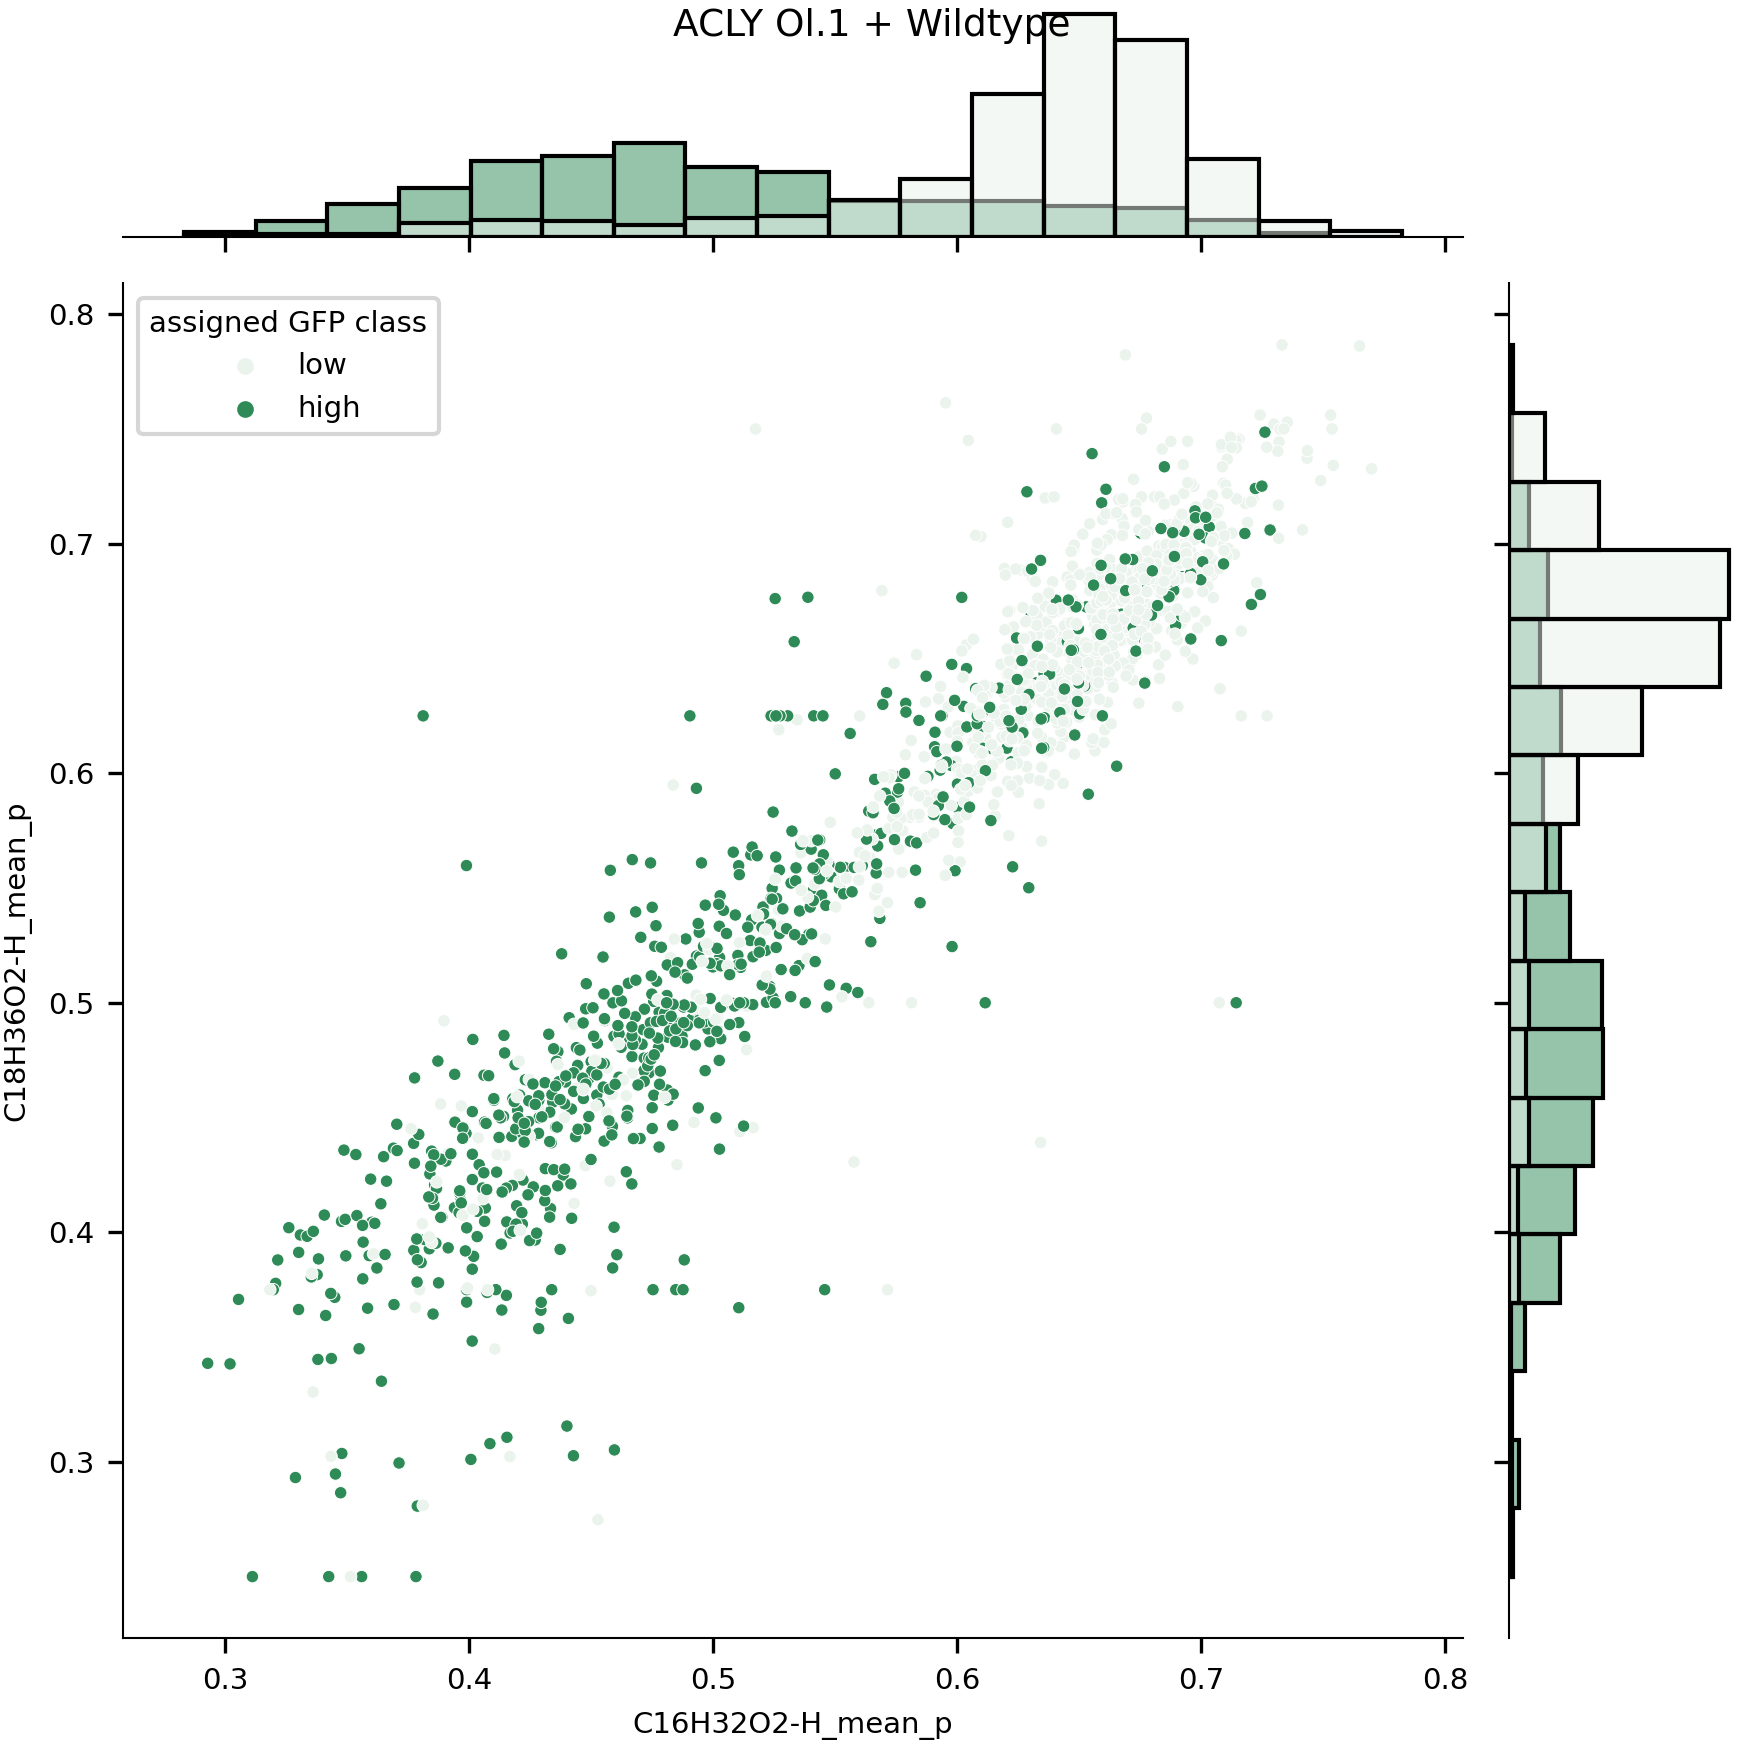

In [19]:
oligo =  "ACLY Ol.1 + Wildtype"
df = adata[(adata.obs.condition == oligo) & (adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_mean_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.suptitle(oligo)
plt.savefig(plots_path / ("mixture_%s_%s_%s.png"%(oligo.replace(" ", "-"), x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s_%s.svg"%(oligo.replace(" ", "-"), x_col, y_col)))

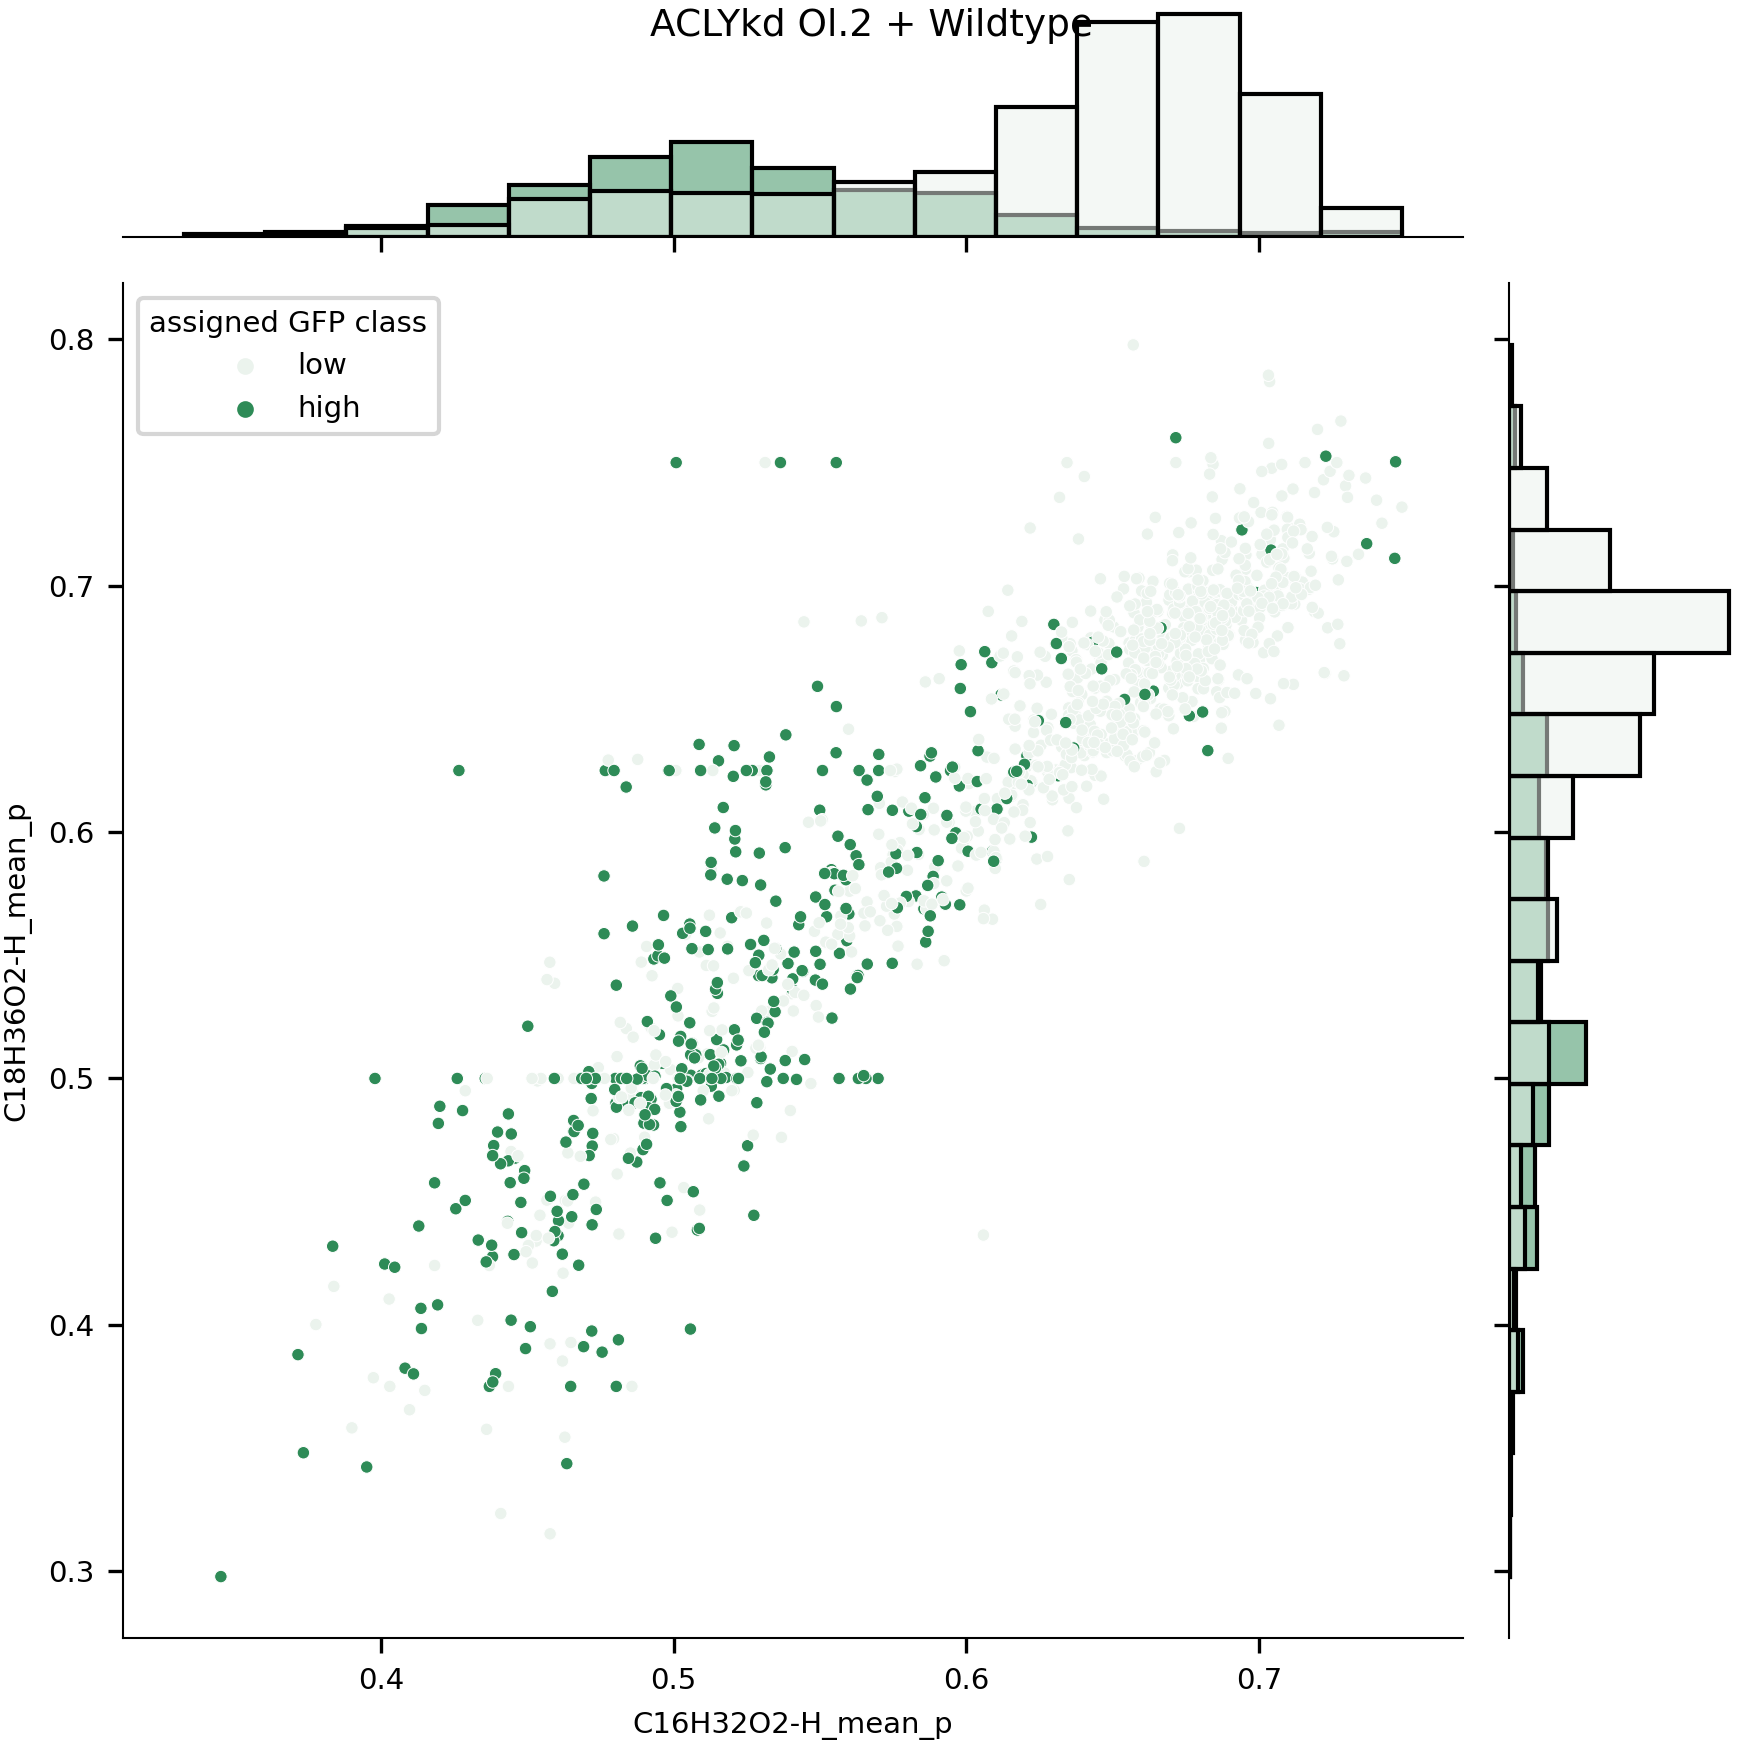

In [20]:
oligo =  "ACLYkd Ol.2 + Wildtype"
df = adata[(adata.obs.condition == oligo) & (adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_mean_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.suptitle(oligo)
plt.savefig(plots_path / ("mixture_%s_%s_%s.png"%(oligo.replace(" ", "-"), x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s_%s.svg"%(oligo.replace(" ", "-"), x_col, y_col)))

## Train classifier on uptake values to predict cell state

In [6]:
adata.obs.condition.value_counts()

ACLY Ol.1 + Wildtype      1598
Wildtype                  1346
ACLYkd Ol.2 + Wildtype    1296
ACLY Ol.1                 1180
ACLYkd Ol.2                837
Name: condition, dtype: int64

In [7]:
adata.obs["knockdown"] = adata.obs.condition.replace({"Wildtype": "Wildtype",
                                                      "ACLY Ol.1": "ACLYkd",
                                                      "ACLYkd Ol.2": "ACLYkd",
                                                      "ACLY Ol.1 + Wildtype": "ACLYkd + Wildtype",
                                                      "ACLYkd Ol.2 + Wildtype": "ACLYkd + Wildtype"})

### Separate wells (predict class assigned based on well's growth conditions)

In [23]:
oligo =  "ACLYkd Ol.2"
adata_separate =  adata[((adata.obs.condition == oligo) | (adata.obs.condition == "Wildtype")) & (adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]

In [24]:
adata_separate

View of AnnData object with n_obs × n_vars = 1359 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9779411764705882


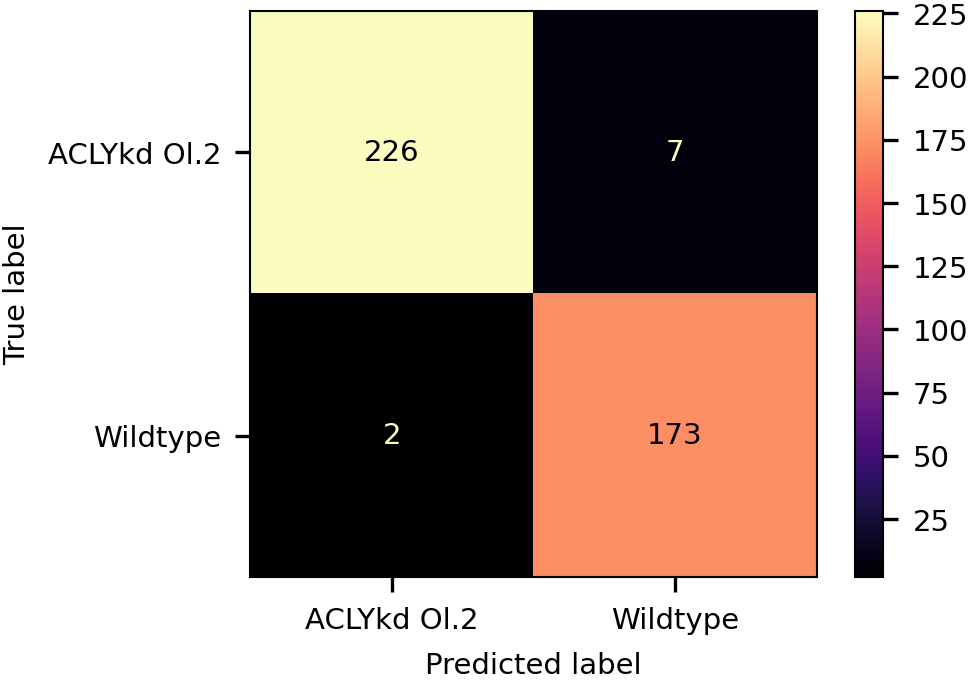

ROC AUC score:  0.9972041692213366


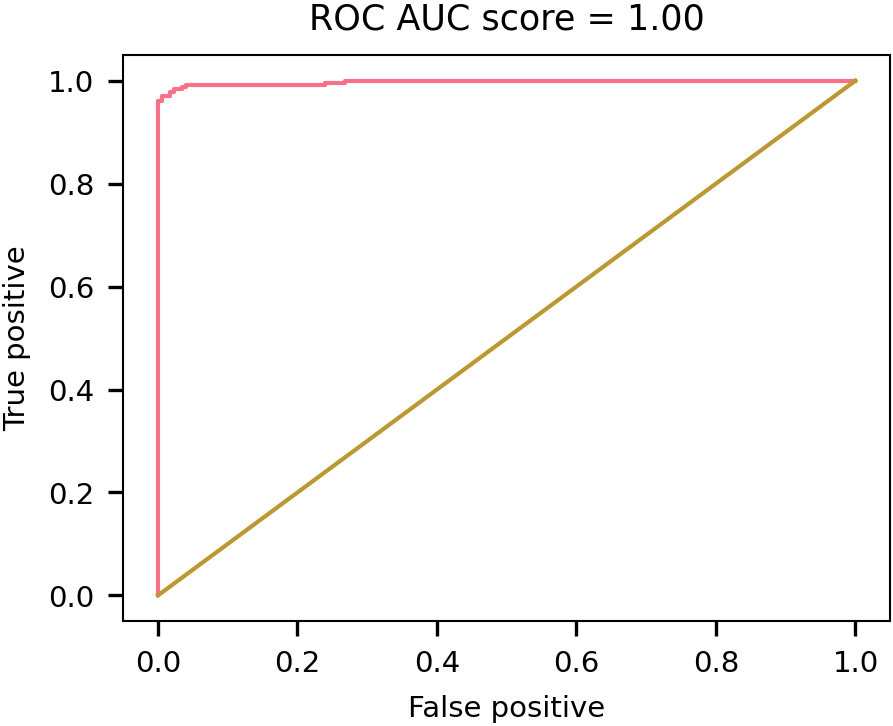

In [25]:
clf = train_classifier(adata_separate, "separate_" + oligo.replace(" ", "-"), oligo, plots_path, "condition")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.7913385826771654


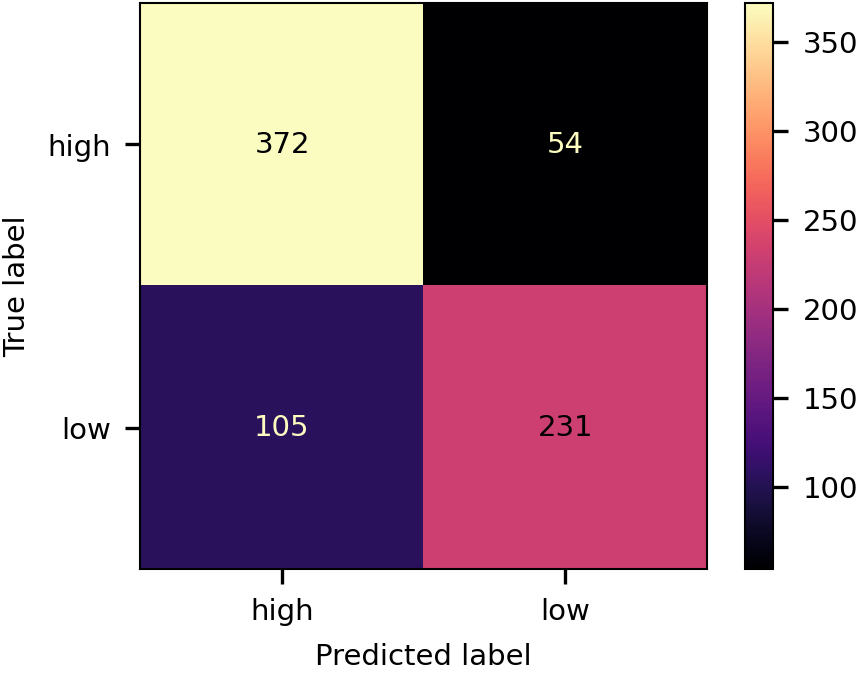

ROC AUC score:  0.8404873686563827


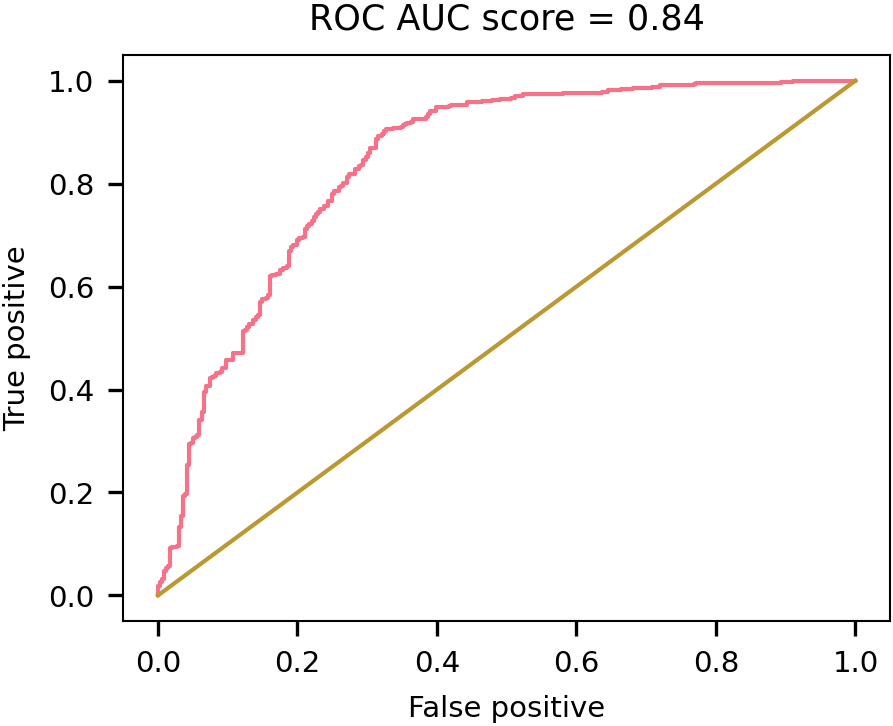

In [12]:
clf = train_classifier(adata_separate, "separate", "high", plots_path, 'assigned GFP class')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  1.0


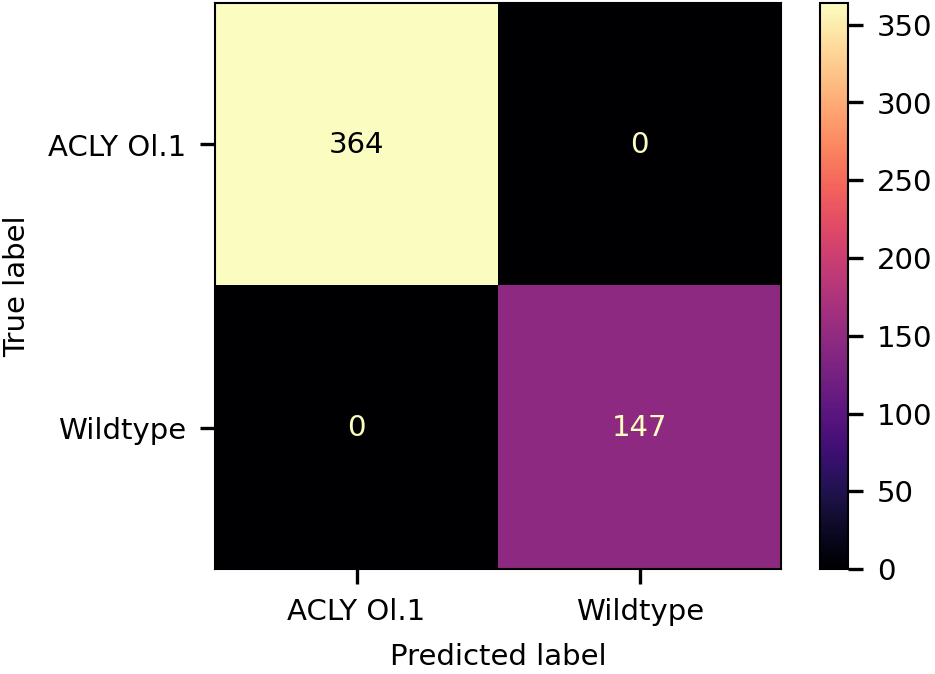

ROC AUC score:  1.0


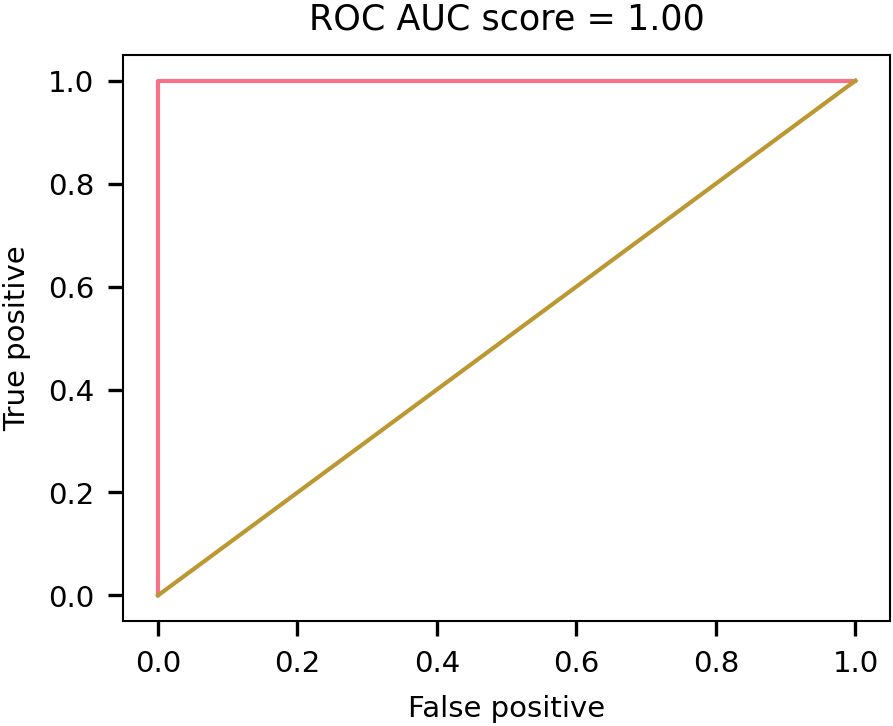

In [26]:
oligo =  "ACLY Ol.1"
adata_separate =  adata[((adata.obs.condition == oligo) | (adata.obs.condition == "Wildtype")) & (adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]

clf = train_classifier(adata_separate, "separate_" + oligo.replace(" ", "-"), oligo, plots_path, "condition")

### Mixture (predict class assigned based on fluorescence)

In [ ]:
"ACLY Ol.1 + Wildtype": "ACLYkd + Wildtype",
                                                      "ACLYkd Ol.2 + Wildtype": "ACLYkd + Wildtype"})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.8125


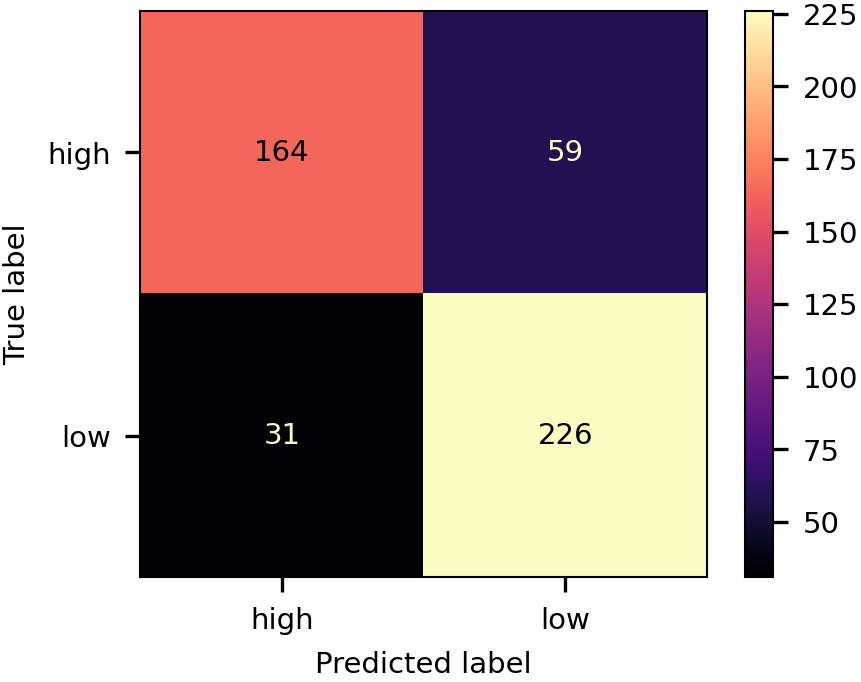

ROC AUC score:  0.8589974001500584


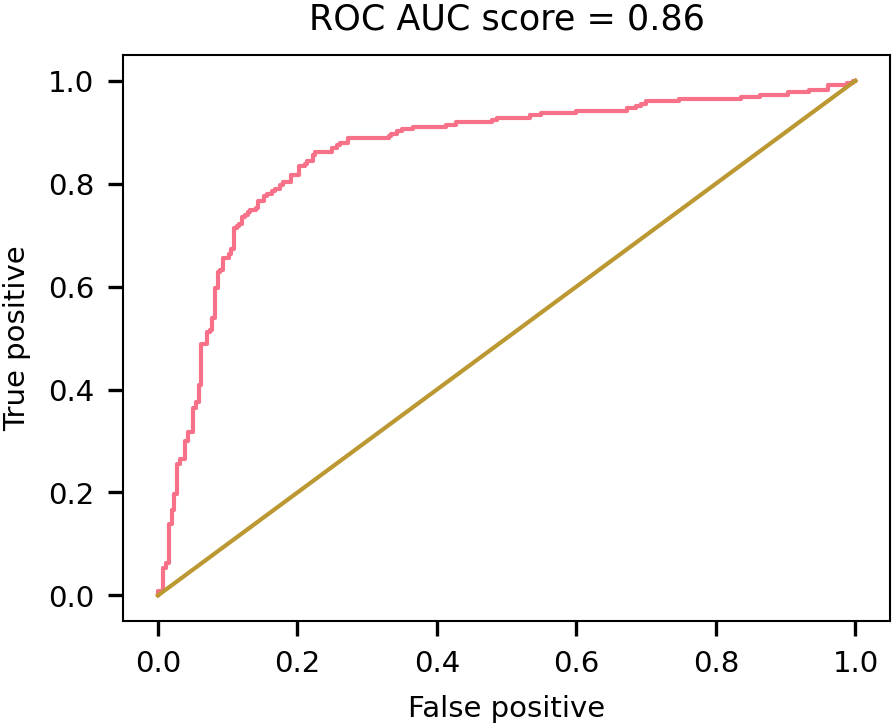

In [27]:
oligo =  "ACLY Ol.1 + Wildtype"
adata_mix =  adata[((adata.obs.condition == oligo) | (adata.obs.condition == "Wildtype")) & (adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")]

clf = train_classifier(adata_mix, "mix_" + oligo.replace(" ", "-"), "high", plots_path, 'assigned GFP class')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.7969151670951157


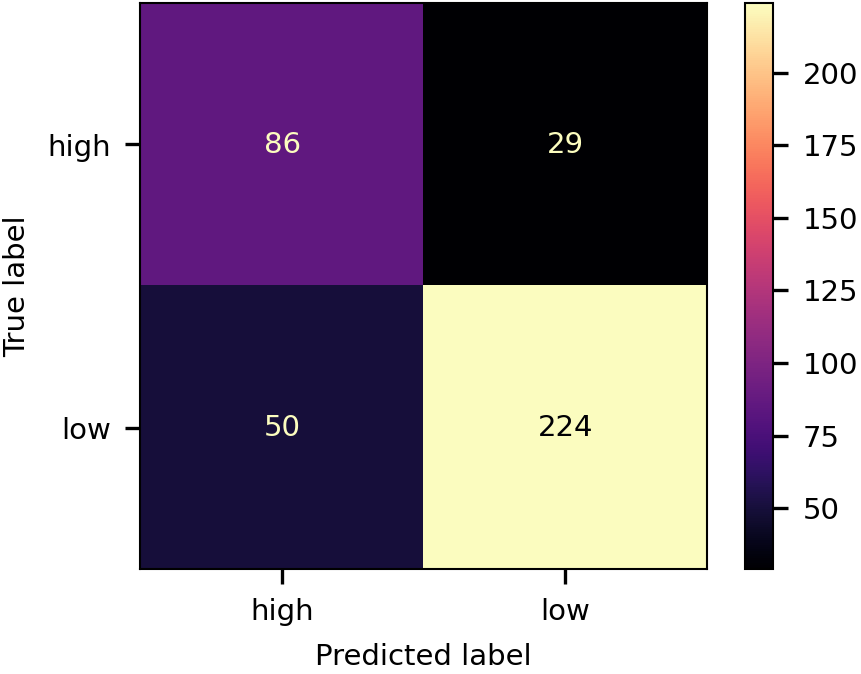

ROC AUC score:  0.851126626467788


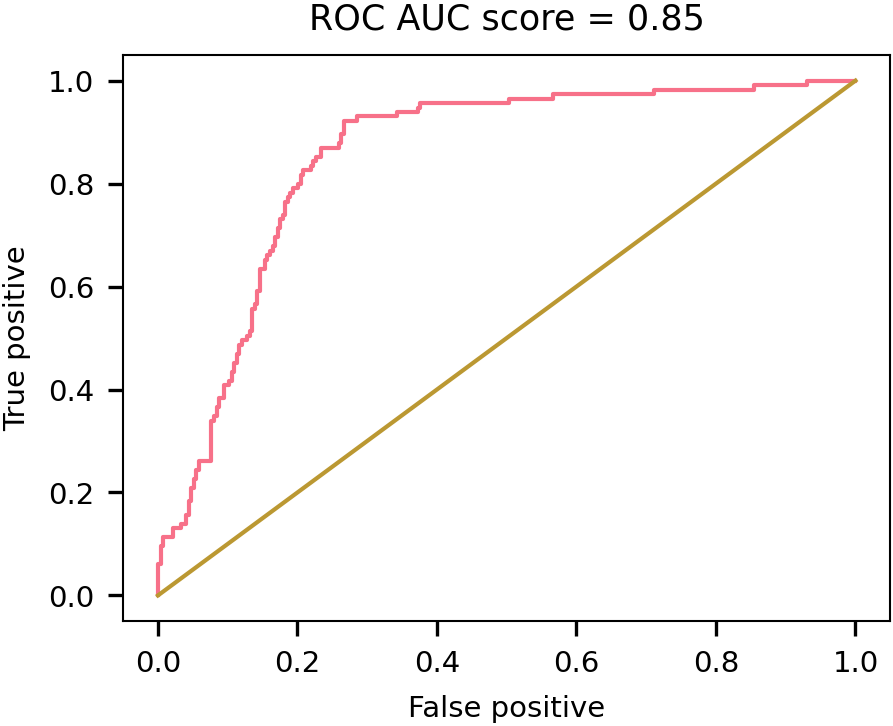

In [28]:
oligo =  "ACLYkd Ol.2 + Wildtype"
adata_mix =  adata[((adata.obs.condition == oligo) | (adata.obs.condition == "Wildtype")) & (adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")]

clf = train_classifier(adata_mix, "mix_" + oligo.replace(" ", "-"), "high", plots_path, 'assigned GFP class')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.7974683544303798


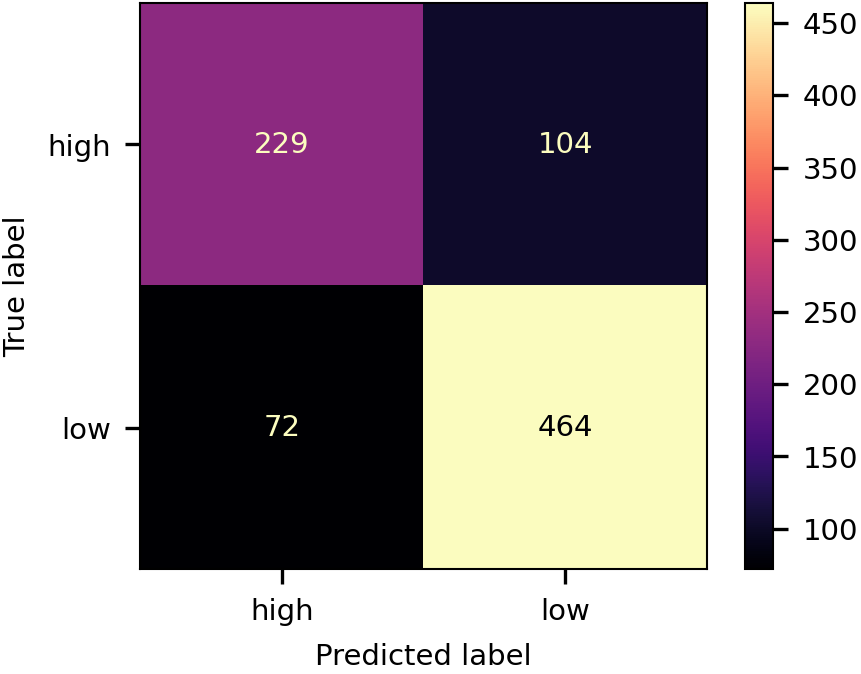

ROC AUC score:  0.8471717986643359


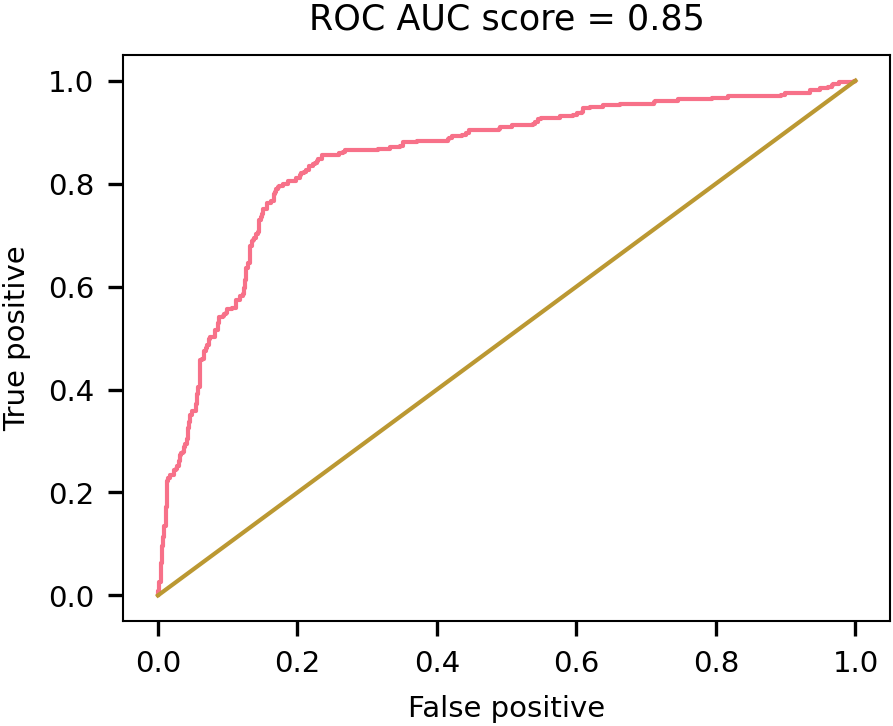

In [14]:
clf = train_classifier(adata_mix, "mix", "high", plots_path, 'assigned GFP class')

## Correlation between spatial features and FA synthesis characteristics

In [31]:
spatial_cols = ['center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio',
                'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1',
                'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area',
                'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0',
                'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5',
                'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2',
                'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2',
                'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2',
                'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2',
                'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1',
                'major_axis_length', 'minor_axis_length']

fa_cols = ['C18H36O2-H_p', 'C18H36O2-H_uptake', 'C18H36O2-H_mean_p',  
           'C18H34O2-H_p', 'C18H34O2-H_uptake', 'C18H34O2-H_mean_p',
           'C16H32O2-H_p', 'C16H32O2-H_uptake', 'C16H32O2-H_mean_p', 
           'C16H30O2-H_p', 'C16H30O2-H_uptake',  'C16H30O2-H_mean_p', 
           'C14H28O2-H_p', 'C14H28O2-H_uptake',  'C14H28O2-H_mean_p']

In [47]:
adata_separate =  adata[(adata.obs.condition == "Wildtype") & (adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]

df = adata_separate.obs[spatial_cols + fa_cols].dropna()
spatial_df = df[spatial_cols]
fa_df = df[fa_cols]

corr_coefs = spatial_df.corrwith(fa_df)

In [63]:
corr_m = df.corr(method="spearman")
corr_m = corr_m.loc[spatial_cols, fa_cols]

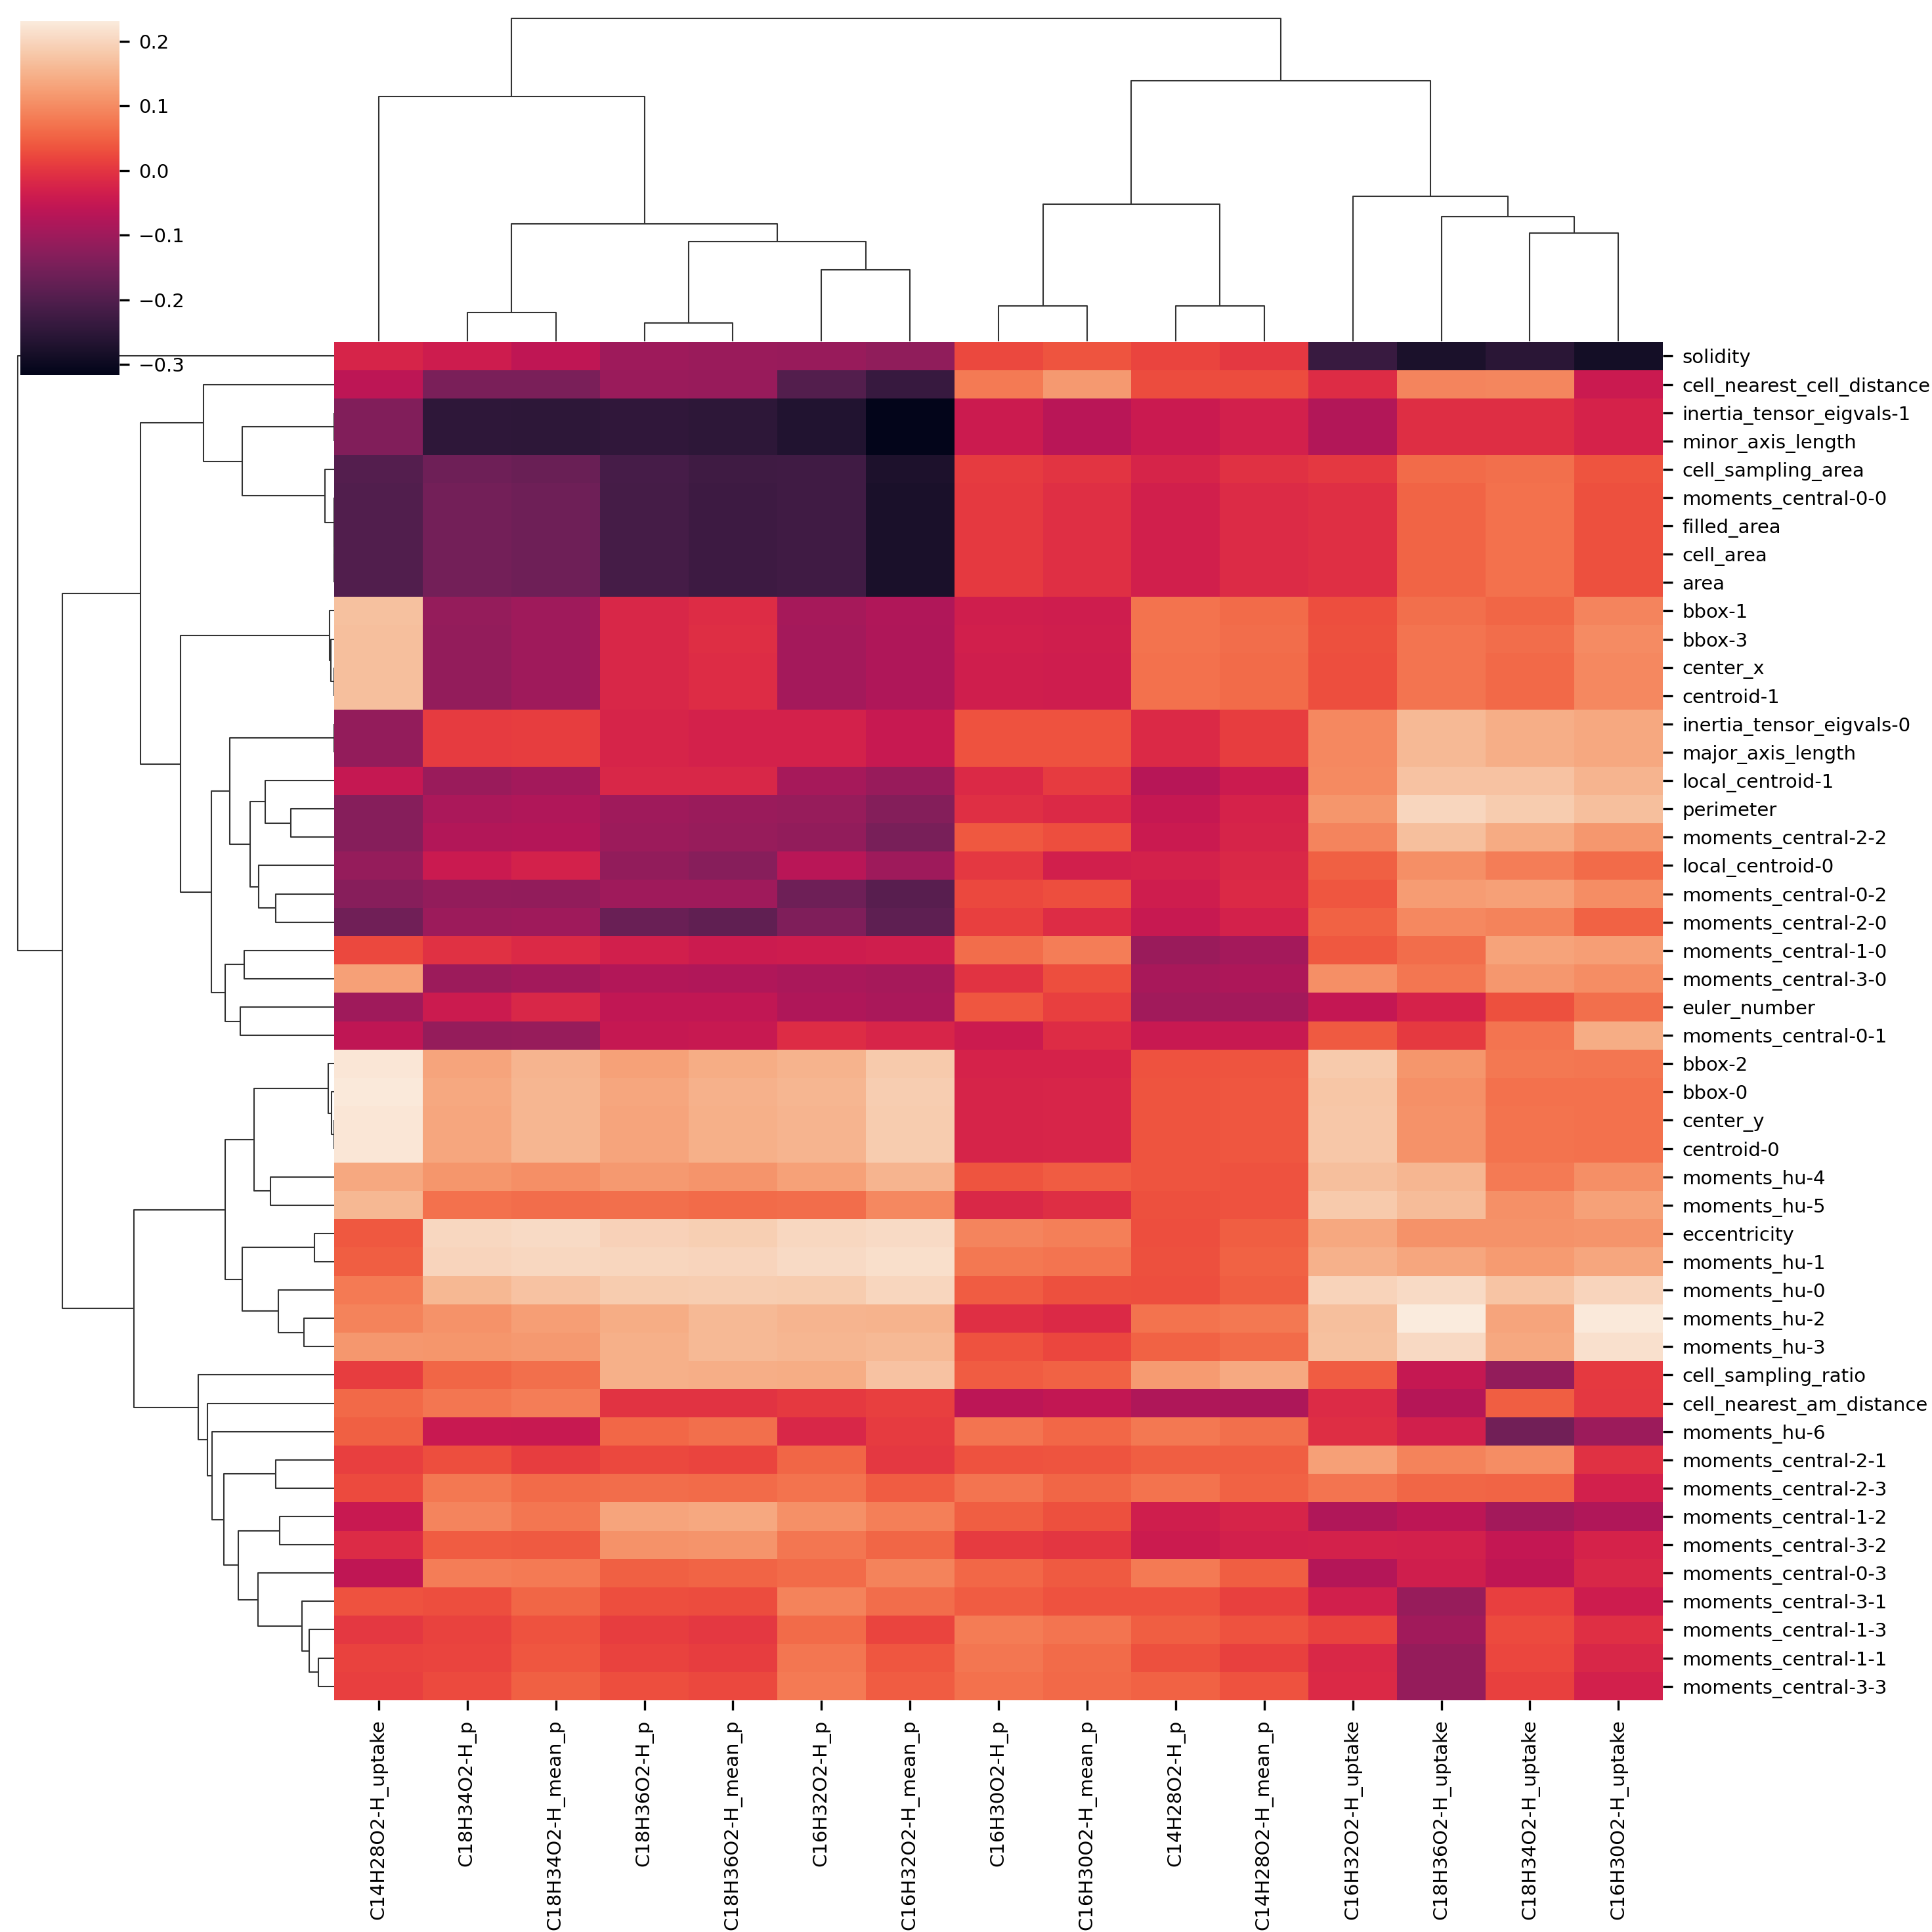

In [64]:
sns.clustermap(corr_m)
plt.savefig(plots_path / "WT_cluster_spatial_features.png")
plt.savefig(plots_path / "WT_cluster_spatial_features.svg")

In [50]:
fa_df

C18H36O2-H_p  C18H36O2-H_uptake  C18H36O2-H_mean_p  \
cell_id                                                            
15617-S1W4-0      0.562967           0.559900           0.634348   
15630-S1W4-0      0.657547           0.582431           0.749428   
15633-S1W4-0      0.573024           0.448707           0.642476   
15645-S1W4-0      0.606158           0.524640           0.688358   
15678-S1W4-0      0.698255           0.673952           0.802324   
...                    ...                ...                ...   
7170-S3W4-2       0.668333           0.684115           0.759852   
7180-S3W4-2       0.592302           0.450371           0.675302   
7191-S3W4-2       0.637458           0.582581           0.728056   
7192-S3W4-2       0.576396           0.616674           0.648342   
7196-S3W4-2       0.607730           0.475459           0.697574   

              C18H34O2-H_p  C18H34O2-H_uptake  C18H34O2-H_mean_p  \
cell_id                                                            
15617-S1W4-0      0.603679           0.761546           0.687839   
15630-S1W4-0      0.609695           0.797709           0.692508   
15633-S1W4-0      0.559444           0.635394           0.632737   
15645-S1W4-0      0.628144           0.673825           0.722121   
15678-S1W4-0      0.552708           0.769790           0.625000   
...                    ...                ...                ...   
7170-S3W4-2       0.603954           0.792476           0.686312   
7180-S3W4-2       0.624540           0.765397           0.710931   
7191-S3W4-2       0.723161           0.844866           0.833878   
7192-S3W4-2       0.591531           0.835820           0.680674   
7196-S3W4-2       0.584044           0.698194           0.671860   

              C16H32O2-H_p  C16H32O2-H_uptake  C16H32O2-H_mean_p  \
cell_id                                                            
15617-S1W4-0      0.613247           0.511928           0.708203   
15630-S1W4-0      0.617768           0.543230           0.711136   
15633-S1W4-0      0.579890           0.459739           0.661444   
15645-S1W4-0      0.618599           0.469279           0.713505   
15678-S1W4-0      0.637494           0.593963           0.742909   
...                    ...                ...                ...   
7170-S3W4-2       0.648854           0.600153           0.744760   
7180-S3W4-2       0.589773           0.468251           0.672972   
7191-S3W4-2       0.629482           0.518340           0.726017   
7192-S3W4-2       0.629847           0.548752           0.716504   
7196-S3W4-2       0.597720           0.474002           0.664820   

              C16H30O2-H_p  C16H30O2-H_uptake  C16H30O2-H_mean_p  \
cell_id                                                            
15617-S1W4-0      0.503222           0.803519           0.571421   
15630-S1W4-0      0.571368           0.800451           0.658616   
15633-S1W4-0      0.609796           0.753161           0.661110   
15645-S1W4-0      0.506005           0.755173           0.571422   
15678-S1W4-0      0.521155           0.852384           0.571429   
...                    ...                ...                ...   
7170-S3W4-2       0.520290           0.934380           0.714286   
7180-S3W4-2       0.521281           0.861648           0.428571   
7191-S3W4-2       0.580435           0.806627           0.669322   
7192-S3W4-2       0.668252           0.804047           0.755035   
7196-S3W4-2       0.602393           0.792504           0.702938   

              C14H28O2-H_p  C14H28O2-H_uptake  C14H28O2-H_mean_p  
cell_id                                                           
15617-S1W4-0      0.638807           0.593642           0.767247  
15630-S1W4-0      0.495558           0.507952           0.579930  
15633-S1W4-0      0.565162           0.674918           0.666666  
15645-S1W4-0      0.595852           0.436132           0.739552  
15678-S1W4-0      0.701917           0.720595           0.833333  
...  

In [48]:
corr_coefs

C14H28O2-H_mean_p   NaN
C14H28O2-H_p        NaN
C14H28O2-H_uptake   NaN
C16H30O2-H_mean_p   NaN
C16H30O2-H_p        NaN
                     ..
moments_hu-4        NaN
moments_hu-5        NaN
moments_hu-6        NaN
perimeter           NaN
solidity            NaN
Length: 63, dtype: float64